# Debate em Dados

### por Daniel N. Rocha

Este estudo analisa dados de um torneio de debates. Debates competitivos funcionam da seguinte forma: debatedores competem em duplas, com cada debate possuindo 4 duplas em posições distintas.

Os debatedorem tem suas posições sorteadas e devem defender ou se opor a uma moção (exemplo: Esta Casa proibiria discurso de ódio), que é divulgada somente 15 minutos antes do debate (os debatedores não podem usar internet neste tempo de preparação).

Cada debate é julgado por uma mesa de juízes que avaliam somente a persuasividade lógico-argumentativa dos debatedores e das duplas para ranquear as duplas (1o, 2o, 3o e 4o lugar) e dar notas individuais aos debatedores (que varia de 50 a 100 speaker points).

Cada torneio possui diversas rodadas classificatórias, e as duplas mais bem colocadas disputam as eliminatórias (quartas, semi e final, a depender do torneio).

A partir de dados coletados no **V Open Minas** (maior torneio de debates em língua portuguesa já realizado), analiso padrões de vítorias e derrotas. Este estudo busca encontrar insights estatísticos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

In [6]:
vopen=pd.read_excel('Divulgacao_V_Open_Minas.xlsx',sheet_name='Dados')
vopen.head()

ID                Nome       SD  Ponto1  Nota1  Sala1  Ponto2  Nota2  \
0   5       Arthur Gandra  Senatus       4     80      2       4     73   
1  29        Luísa Côrtes  Senatus       4     72      8       4     77   
2  14    João Lucas Lopes   SdDUFC       4     72      4       4     75   
3   5         Pedro Lopes  Senatus       4     79      2       4     71   
4  54  Carolina Marcondes      SDV       4     80     14       1     70   

   Sala2  Ponto3  ...  Nota5  Sala5  Pontuação  Dificuldade  Nota Final  \
0     24       4  ...     82     79         17        59.75        77.2   
1     23       1  ...     76     79         16        57.00        77.2   
2     22       3  ...     72     77         17        57.00        77.0   
3     24       4  ...     78     79         17        59.75        76.6   
4     20       4  ...     70     81         14        54.50        76.6   

      Rodada  1D  1O  2D  2O  
0  1ª Rodada  33  34  35  36  
1  3ª Rodada  46  11  25   1  
2  2ª Rodada  20  51  62   2  
3  1ª Rodada  37  38  39  40  
4          0   0   0   0   0  

[5 rows x 26 columns]

**ID** representa o código de uma dada dupla

**Nome** representa cada debatedor de uma dada dupla

**PontoX** é a pontução de uma dada dupla na rodada X

**NotaX** é a nota individual de um debatedor na rodada X

**SalaX** é a sala na qual um debatedor estava na rodada X

**Pontuação** é o somatório dos pontos obtidos em cada rodada

**Nota Final** é a média das notas individuais obtidas em cada rodada

**Dificuldade** representa o somatório da pontuação dos adversários enfrentados

**Rodada** representa o número da rodada na qual os dados de 1D, 1O, 2D e 2O se relacionam

**1D, 1O, 2D e 2O** representam as posições que cada dupla tirou em cada sala para uma dada rodada

## Desempenho por Posição
#### Posição com mais chance de vitória:

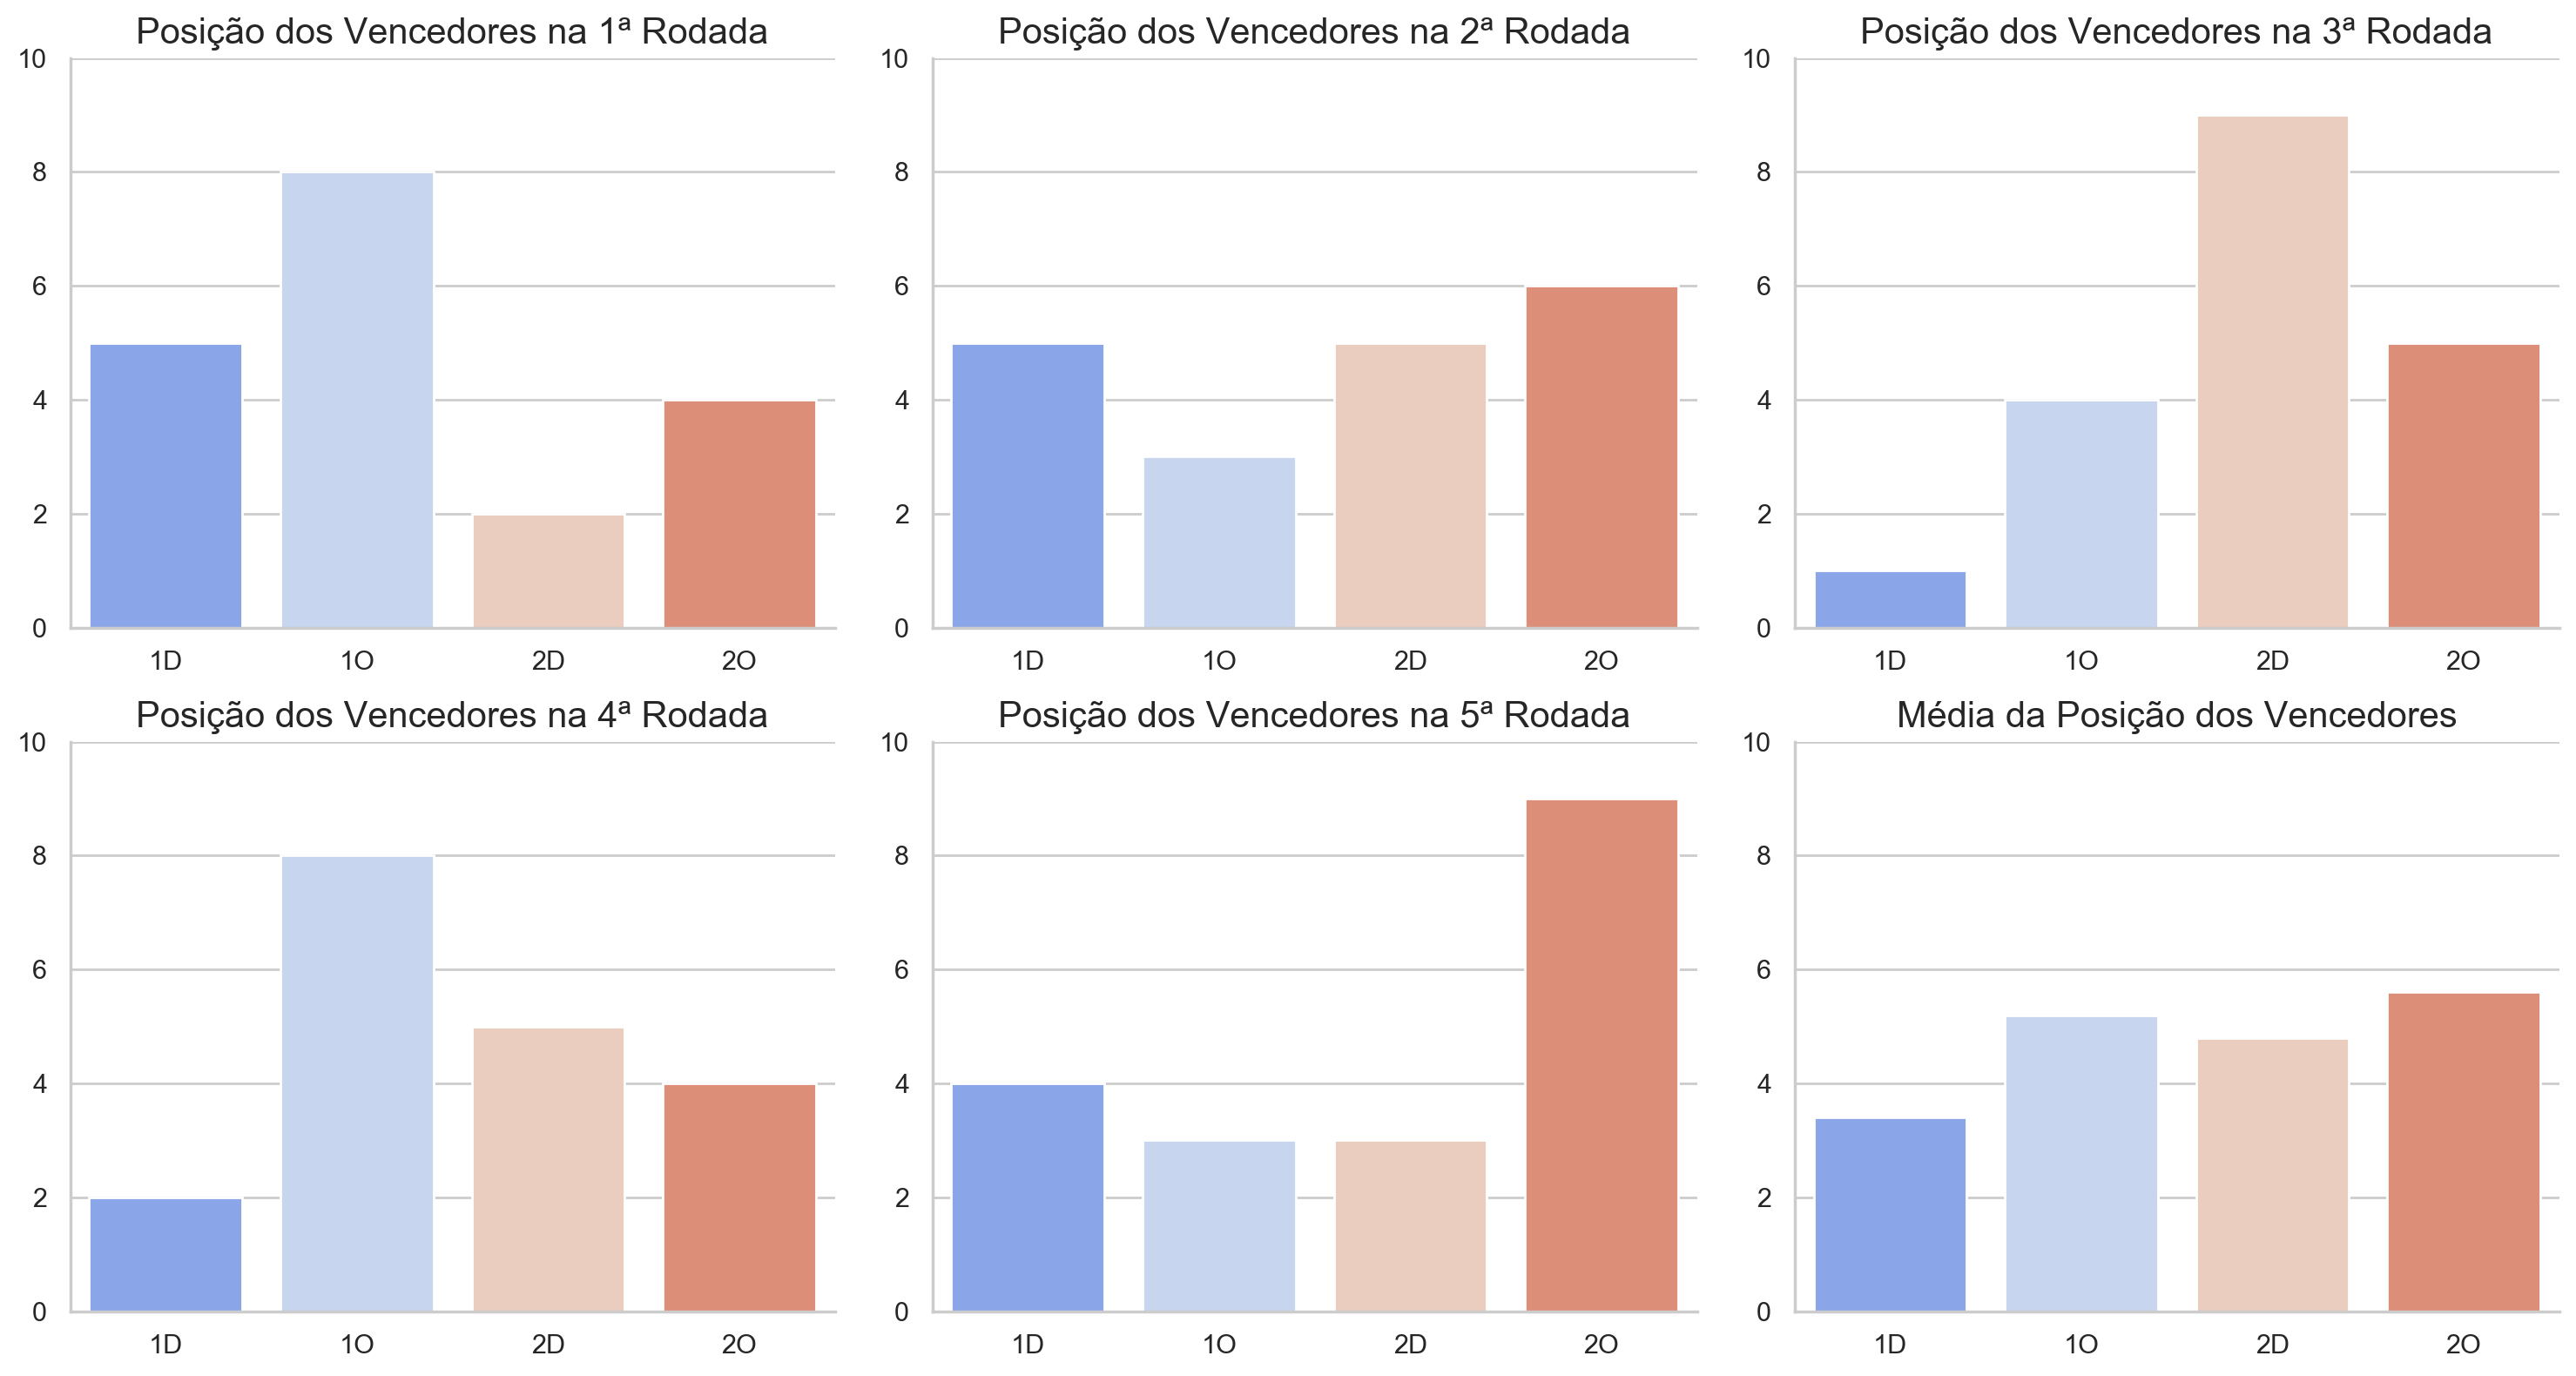

In [3]:
qtd=0
qt=0
q=0
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
plt.figure(figsize=(15,8),dpi=200)
for key,value in {'Ponto1':'1ª Rodada','Ponto2':'2ª Rodada','Ponto3':'3ª Rodada','Ponto4':'4ª Rodada','Ponto5':'5ª Rodada'}.items():
    vencedoras_rodada=list(set(vopen[vopen[key]==4]['ID'].tolist()))
    vencedoras_rodada_por_posicao=[]
    lista=[]
    for posicao in ['1D','1O','2D','2O']:
        vencedoras_posicao_rodada=0
        for dupla in vencedoras_rodada:
            if list(set(vopen[(vopen['Rodada']==value)&(vopen[posicao]==dupla)].count().tolist()))[0]==1:
                vencedoras_posicao_rodada+=1
        vencedoras_rodada_por_posicao.append(vencedoras_posicao_rodada)
        lista.append([value,posicao,vencedoras_posicao_rodada])
    k=np.array(vencedoras_rodada_por_posicao)
    qtd+=1
    if qtd==1:
        vencedores_classificatorias_por_posicao=k
        lista1=lista
        lista1=np.array((lista1)).reshape(4,3)
        df_vitorias=pd.DataFrame(data=lista1[:,:],columns=['Posição dos Vencedores','Posição','Vitórias'])
    elif qtd==2:
        vencedores_classificatorias_por_posicao+=k
        lista2=lista
        lista2=np.array((lista2)).reshape(4,3)
        for i in range(0,4):
            df_vitorias.loc[i+5]=lista2[i,:]
    elif qtd==3:
        vencedores_classificatorias_por_posicao+=k
        lista3=lista
        lista3=np.array((lista3)).reshape(4,3)
        for i in range(0,4):
            df_vitorias.loc[i+9]=lista3[i,:]        
    elif qtd==4:
        vencedores_classificatorias_por_posicao+=k
        lista4=lista
        lista4=np.array((lista4)).reshape(4,3)
        for i in range(0,4):
            df_vitorias.loc[i+13]=lista4[i,:]           
    elif qtd==5:
        vencedores_classificatorias_por_posicao+=k
        lista5=lista
        lista5=np.array((lista5)).reshape(4,3)      
        for i in range(0,4):
            df_vitorias.loc[i+17]=lista5[i,:]  
    df_vitorias['Vitórias']=df_vitorias['Vitórias'].astype('int32')
    plt.subplot(2,3,qtd)
    a=sns.barplot(x='Posição',y='Vitórias',data=df_vitorias[df_vitorias['Posição dos Vencedores']==value],palette='coolwarm')
    a.set_ylim([0,10])
    a.set_title('Posição dos Vencedores na '+value,size=15)
    a.set(ylabel='',xlabel='')
for i in df_vitorias.groupby('Posição').mean()['Vitórias'].tolist():
    qt+=1
    if qt==1:
        lista6.append(['Média','1D',i])
    elif qt==2:
        lista6.append(['Média','1O',i])
    elif qt==3:
        lista6.append(['Média','2D',i])
    elif qt==4:
        lista6.append(['Média','2O',i])
qtd=6
if qtd==6:
    lista6=np.array((lista6)).reshape(4,3)
    for i in range(0,4):
        df_vitorias.loc[i+21]=lista6[i,:]
df_vitorias['Vitórias']=df_vitorias['Vitórias'].astype('float32')
for i in df_vitorias.groupby('Posição').std()['Vitórias'].tolist():
    q+=1
    if q==1:
        lista7.append(['Desvio Padrão','1D',i])
    elif q==2:
        lista7.append(['Desvio Padrão','1O',i])
    elif q==3:
        lista7.append(['Desvio Padrão','2D',i])
    elif q==4:
        lista7.append(['Desvio Padrão','2O',i])
qtd=7
if qtd==7:
    lista7=np.array((lista7)).reshape(4,3)
    for i in range(0,4):
        df_vitorias.loc[i+25]=lista7[i,:]
df_vitorias['Vitórias']=df_vitorias['Vitórias'].astype('float32')
plt.subplot(2,3,6)
f=sns.barplot(x='Posição',y='Vitórias',data=df_vitorias[df_vitorias['Posição dos Vencedores']=='Média'],palette='coolwarm')
f.set_ylim([0,10])
f.set_title('Média da Posição dos Vencedores',size=15)
f.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Posição com mais chance de vices:

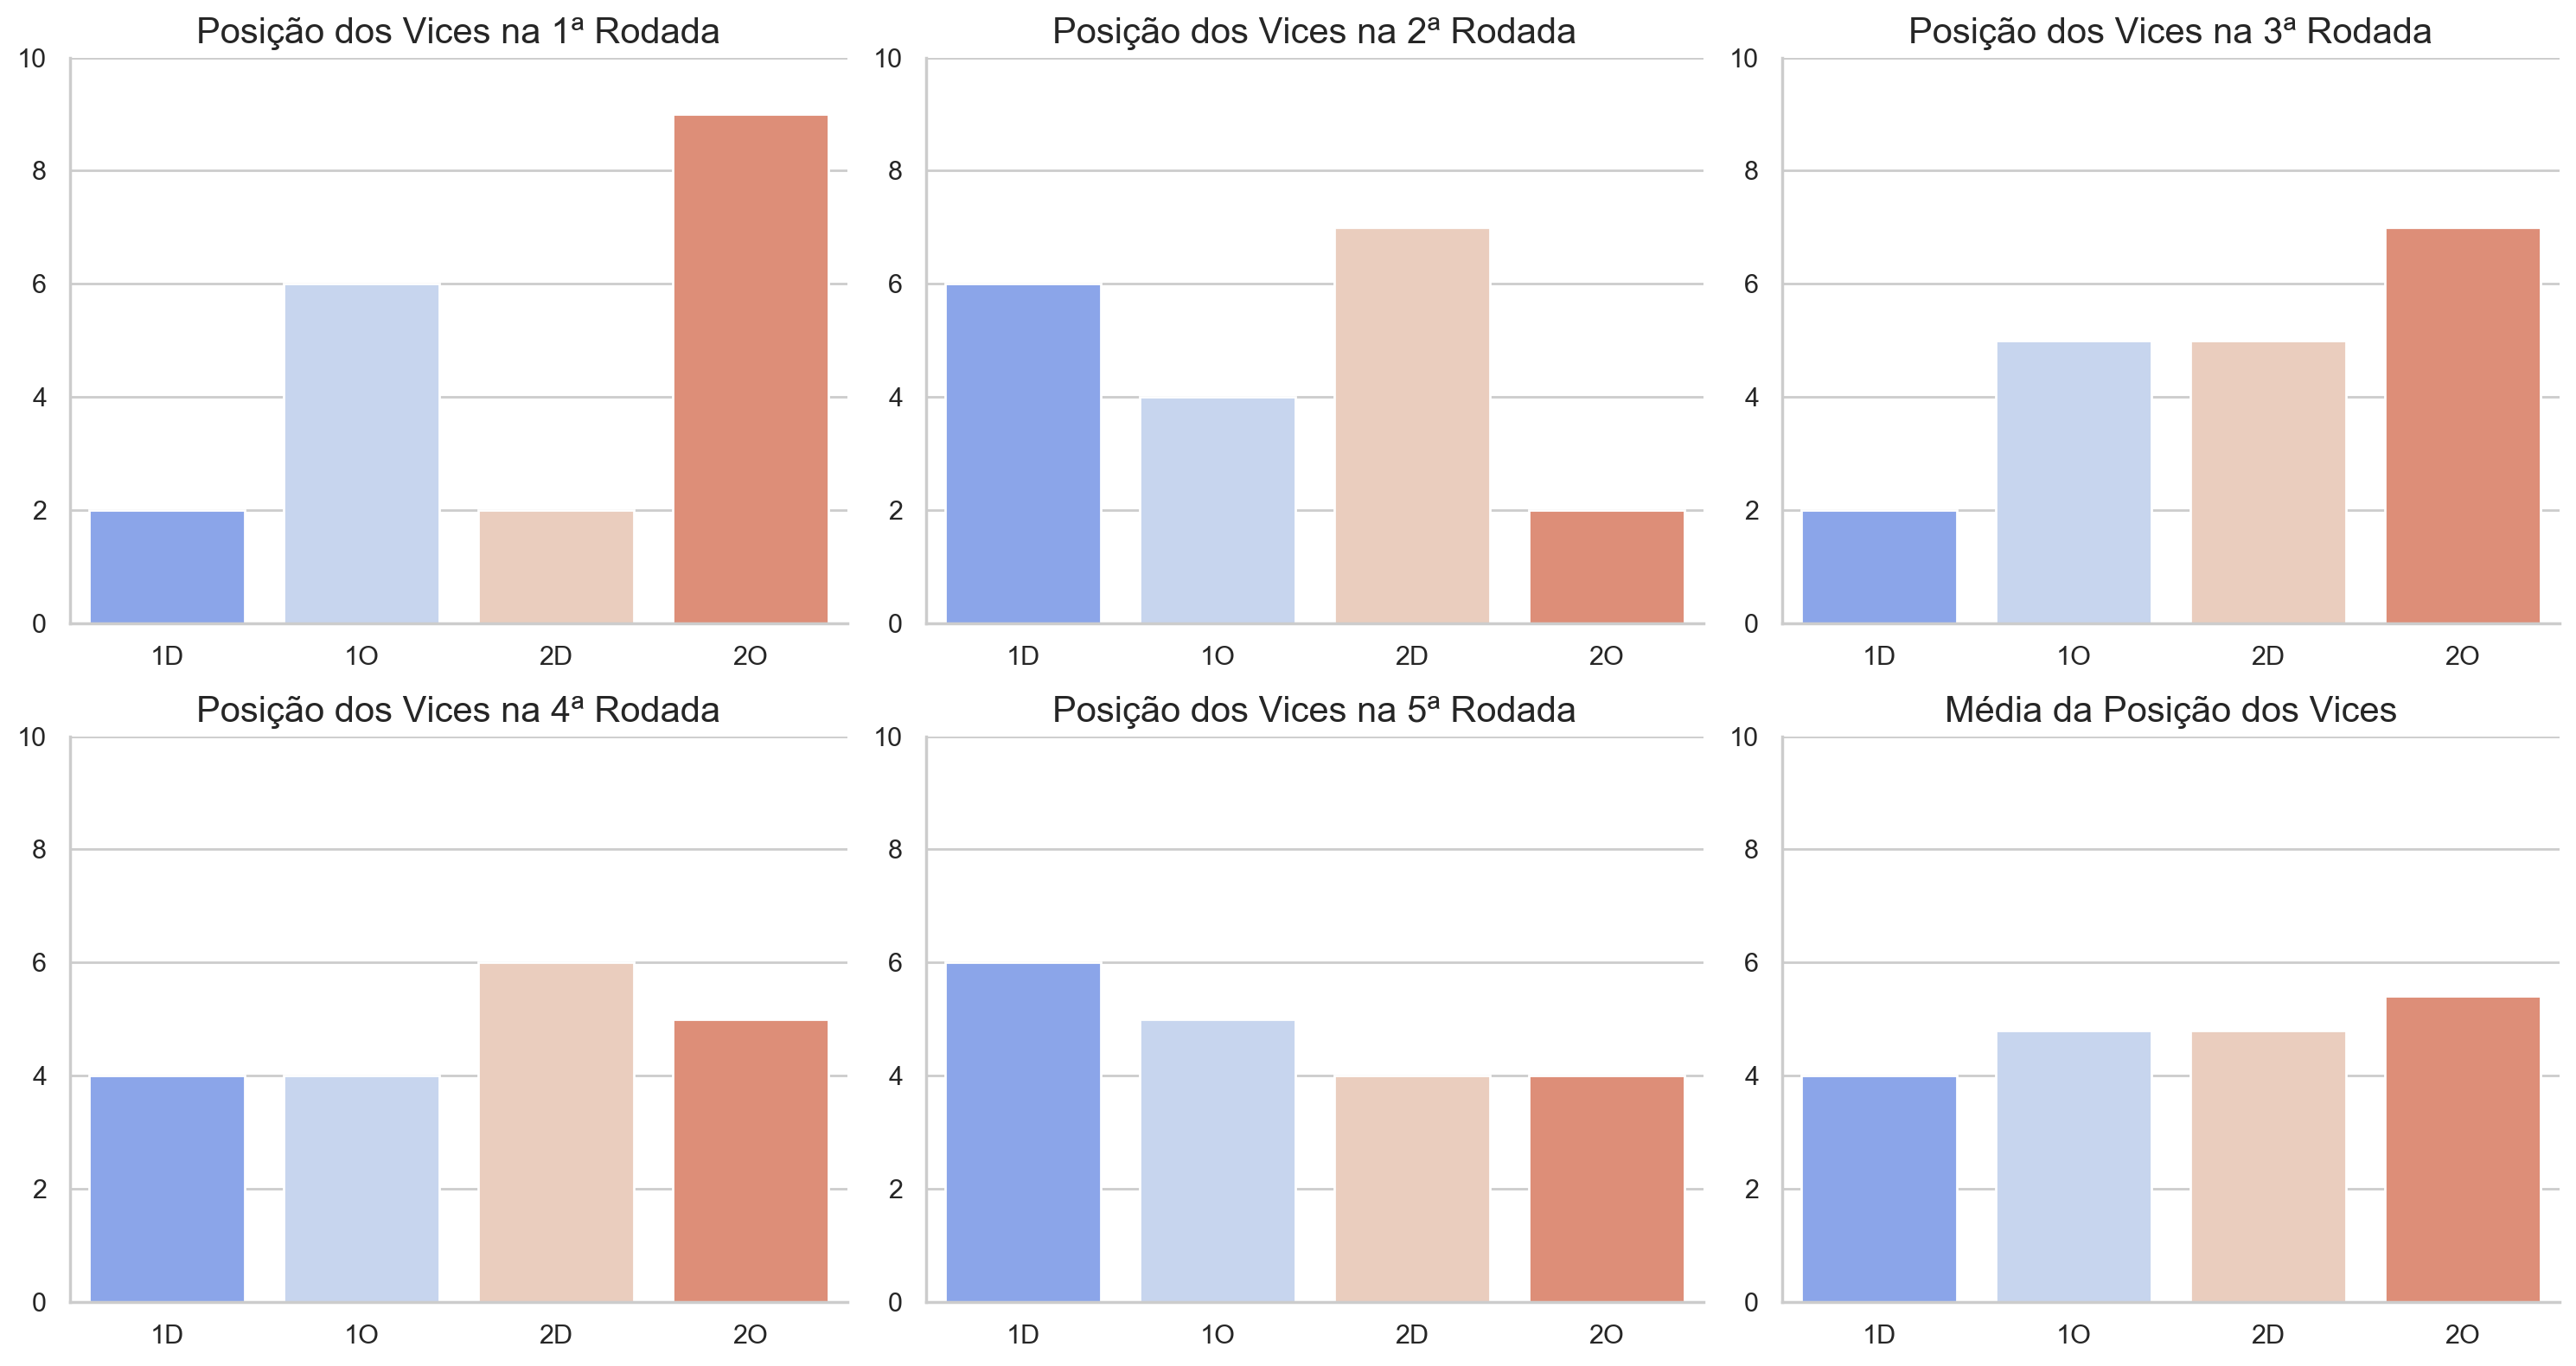

In [4]:
qtd=0
qt=0
q=0
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
plt.figure(figsize=(15,8),dpi=200)
for key,value in {'Ponto1':'1ª Rodada','Ponto2':'2ª Rodada','Ponto3':'3ª Rodada','Ponto4':'4ª Rodada','Ponto5':'5ª Rodada'}.items():
    vices_rodada=list(set(vopen[vopen[key]==3]['ID'].tolist()))
    vices_rodada_por_posicao=[]
    lista=[]
    for posicao in ['1D','1O','2D','2O']:
        vices_posicao_rodada=0
        for dupla in vices_rodada:
            if list(set(vopen[(vopen['Rodada']==value)&(vopen[posicao]==dupla)].count().tolist()))[0]==1:
                vices_posicao_rodada+=1
        vices_rodada_por_posicao.append(vices_posicao_rodada)
        lista.append([value,posicao,vices_posicao_rodada])
    k=np.array(vices_rodada_por_posicao)
    qtd+=1
    if qtd==1:
        vices_classificatorias_por_posicao=k
        lista1=lista
        lista1=np.array((lista1)).reshape(4,3)
        df_vices=pd.DataFrame(data=lista1[:,:],columns=['Posição dos Vices','Posição','Vices'])
    elif qtd==2:
        vices_classificatorias_por_posicao+=k
        lista2=lista
        lista2=np.array((lista2)).reshape(4,3)
        for i in range(0,4):
            df_vices.loc[i+5]=lista2[i,:]
    elif qtd==3:
        vices_classificatorias_por_posicao+=k
        lista3=lista
        lista3=np.array((lista3)).reshape(4,3)
        for i in range(0,4):
            df_vices.loc[i+9]=lista3[i,:]        
    elif qtd==4:
        vices_classificatorias_por_posicao+=k
        lista4=lista
        lista4=np.array((lista4)).reshape(4,3)
        for i in range(0,4):
            df_vices.loc[i+13]=lista4[i,:]           
    elif qtd==5:
        vices_classificatorias_por_posicao+=k
        lista5=lista
        lista5=np.array((lista5)).reshape(4,3)      
        for i in range(0,4):
            df_vices.loc[i+17]=lista5[i,:]  
    df_vices['Vices']=df_vices['Vices'].astype('int32')
    plt.subplot(2,3,qtd)
    a=sns.barplot(x='Posição',y='Vices',data=df_vices[df_vices['Posição dos Vices']==value],palette='coolwarm')
    a.set_ylim([0,10])
    a.set_title('Posição dos Vices na '+value,size=15)
    a.set(ylabel='',xlabel='')
for i in df_vices.groupby('Posição').mean()['Vices'].tolist():
    qt+=1
    if qt==1:
        lista6.append(['Média','1D',i])
    elif qt==2:
        lista6.append(['Média','1O',i])
    elif qt==3:
        lista6.append(['Média','2D',i])
    elif qt==4:
        lista6.append(['Média','2O',i])
qtd=6
if qtd==6:
    lista6=np.array((lista6)).reshape(4,3)
    for i in range(0,4):
        df_vices.loc[i+21]=lista6[i,:]
df_vices['Vices']=df_vices['Vices'].astype('float32')
for i in df_vices.groupby('Posição').std()['Vices'].tolist():
    q+=1
    if q==1:
        lista7.append(['Desvio Padrão','1D',i])
    elif q==2:
        lista7.append(['Desvio Padrão','1O',i])
    elif q==3:
        lista7.append(['Desvio Padrão','2D',i])
    elif q==4:
        lista7.append(['Desvio Padrão','2O',i])
qtd=7
if qtd==7:
    lista7=np.array((lista7)).reshape(4,3)
    for i in range(0,4):
        df_vices.loc[i+25]=lista7[i,:]
df_vices['Vices']=df_vices['Vices'].astype('float32')
plt.subplot(2,3,6)
f=sns.barplot(x='Posição',y='Vices',data=df_vices[df_vices['Posição dos Vices']=='Média'],palette='coolwarm')
f.set_ylim([0,10])
f.set_title('Média da Posição dos Vices',size=15)
f.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Posição com mais chance de terceiros:

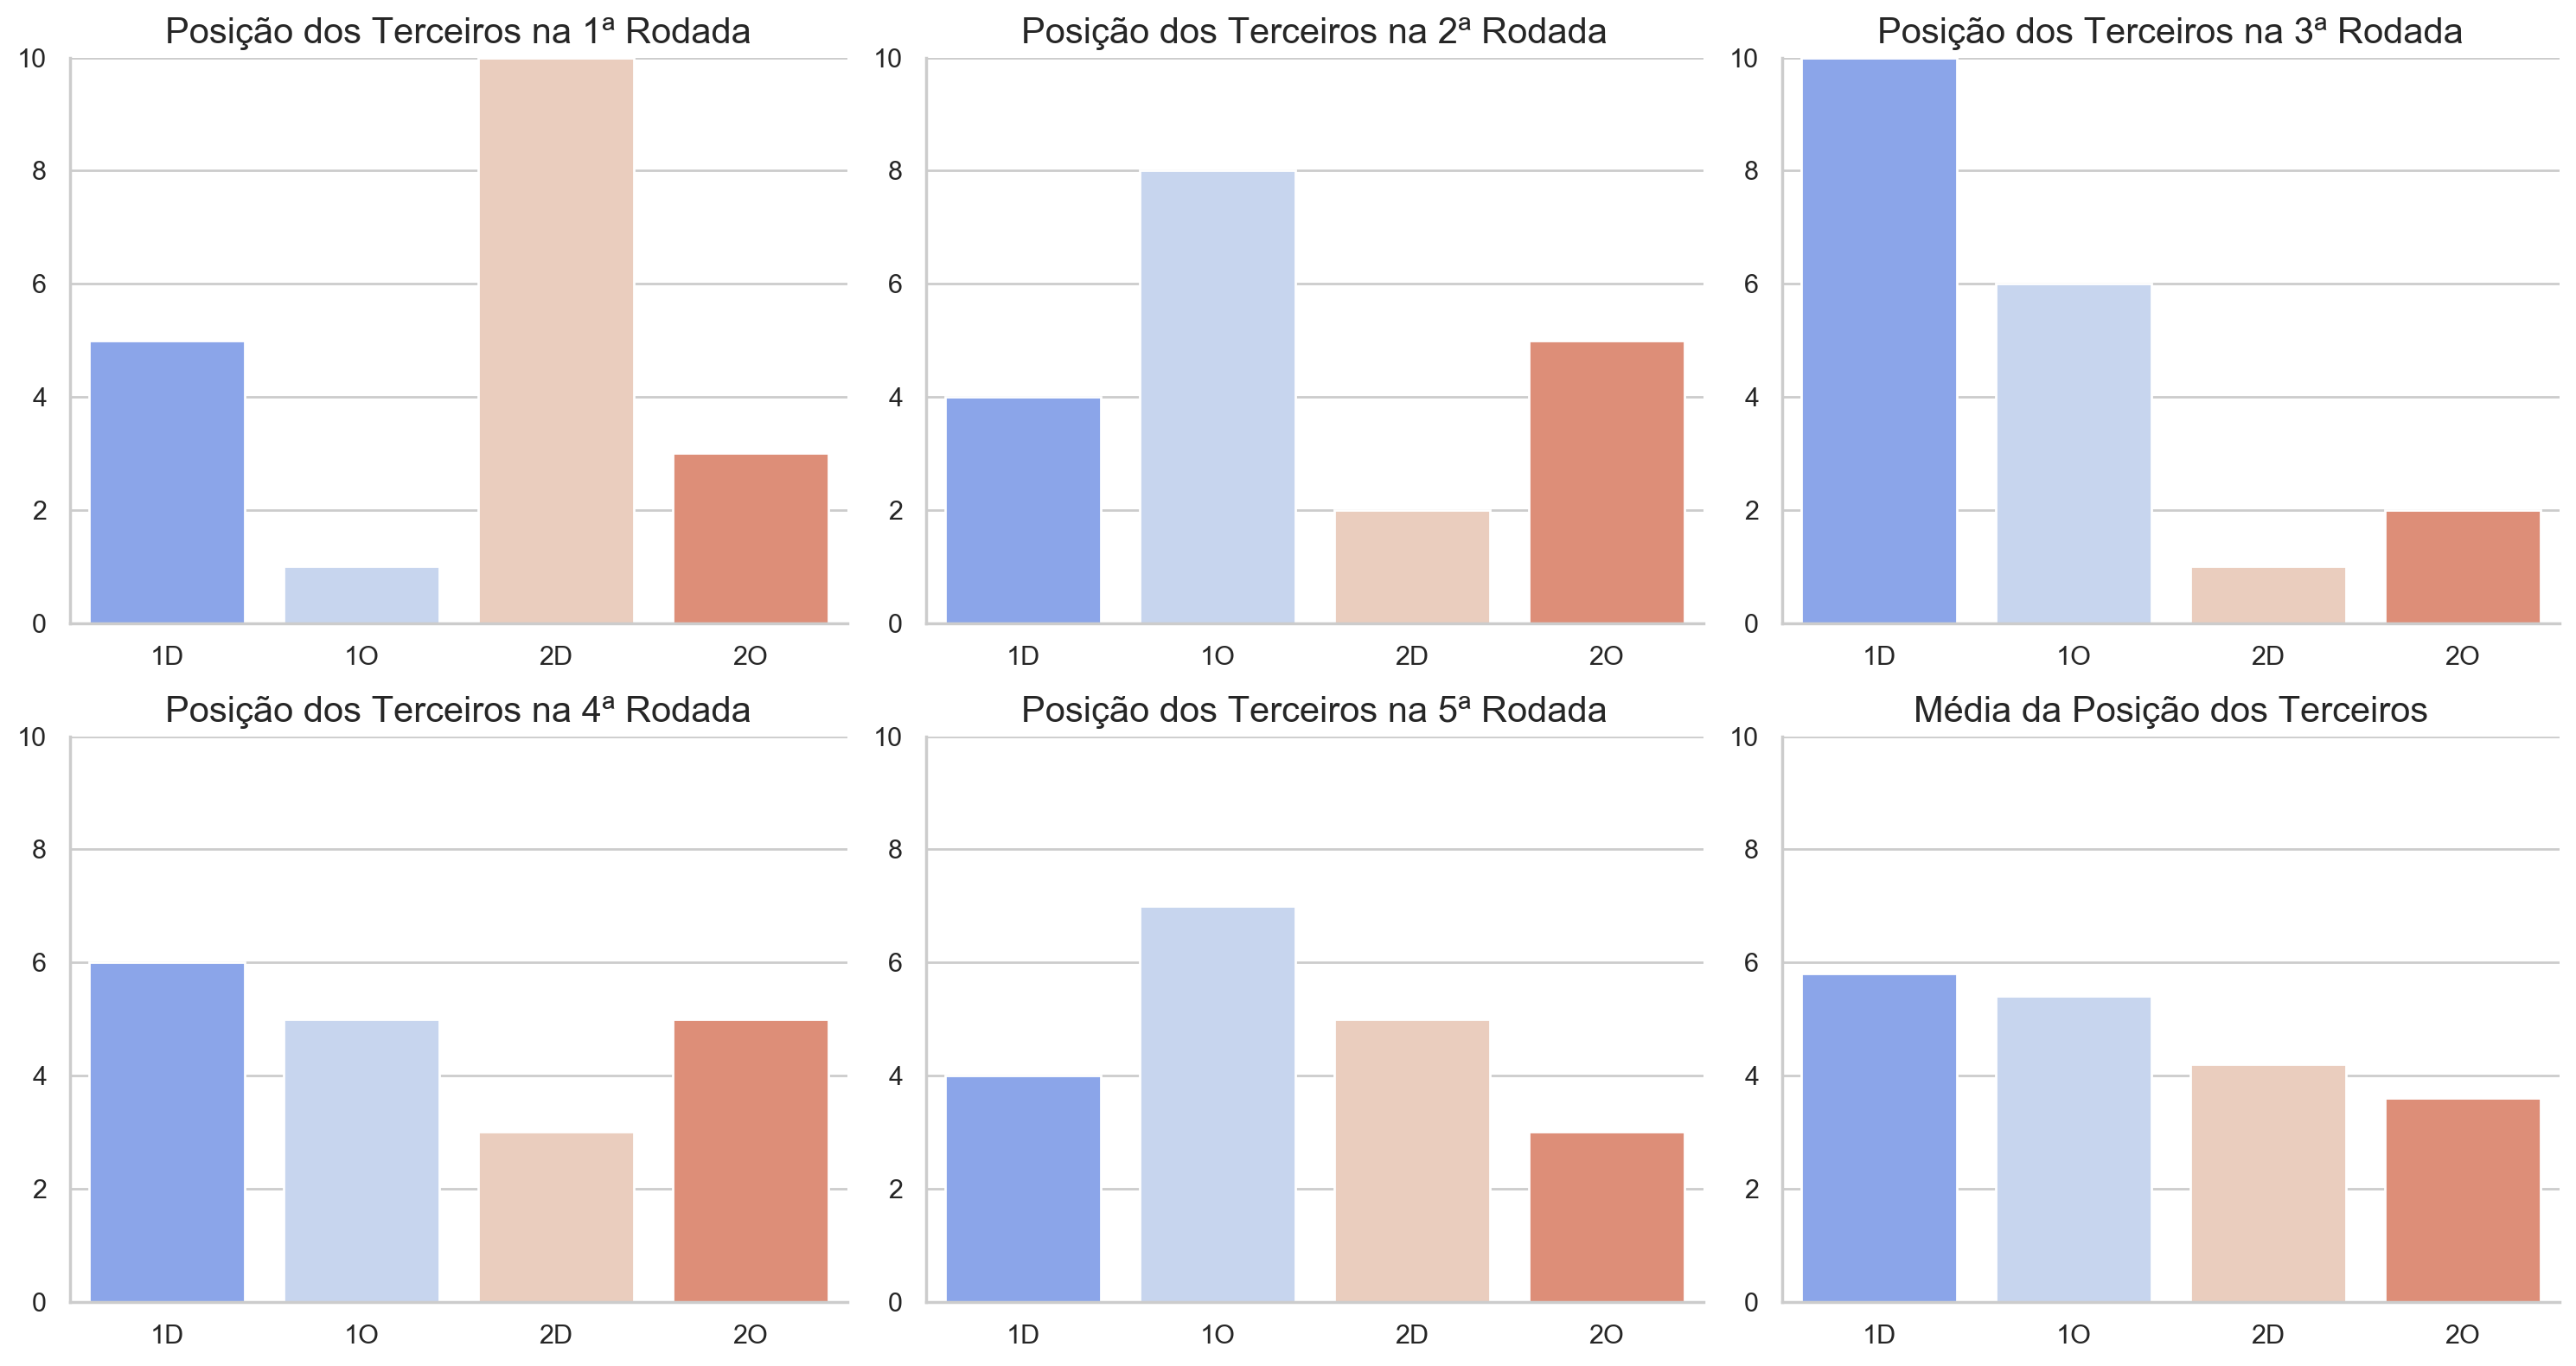

In [5]:
qtd=0
qt=0
q=0
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
plt.figure(figsize=(15,8),dpi=200)
for key,value in {'Ponto1':'1ª Rodada','Ponto2':'2ª Rodada','Ponto3':'3ª Rodada','Ponto4':'4ª Rodada','Ponto5':'5ª Rodada'}.items():
    terceiros_rodada=list(set(vopen[vopen[key]==2]['ID'].tolist()))
    terceiros_rodada_por_posicao=[]
    lista=[]
    for posicao in ['1D','1O','2D','2O']:
        terceiros_posicao_rodada=0
        for dupla in terceiros_rodada:
            if list(set(vopen[(vopen['Rodada']==value)&(vopen[posicao]==dupla)].count().tolist()))[0]==1:
                terceiros_posicao_rodada+=1
        terceiros_rodada_por_posicao.append(terceiros_posicao_rodada)
        lista.append([value,posicao,terceiros_posicao_rodada])
    k=np.array(terceiros_rodada_por_posicao)
    qtd+=1
    if qtd==1:
        terceiros_classificatorias_por_posicao=k
        lista1=lista
        lista1=np.array((lista1)).reshape(4,3)
        df_terceiros=pd.DataFrame(data=lista1[:,:],columns=['Posição dos Terceiros','Posição','Terceiros'])
    elif qtd==2:
        terceiros_classificatorias_por_posicao+=k
        lista2=lista
        lista2=np.array((lista2)).reshape(4,3)
        for i in range(0,4):
            df_terceiros.loc[i+5]=lista2[i,:]
    elif qtd==3:
        terceiros_classificatorias_por_posicao+=k
        lista3=lista
        lista3=np.array((lista3)).reshape(4,3)
        for i in range(0,4):
            df_terceiros.loc[i+9]=lista3[i,:]        
    elif qtd==4:
        terceiros_classificatorias_por_posicao+=k
        lista4=lista
        lista4=np.array((lista4)).reshape(4,3)
        for i in range(0,4):
            df_terceiros.loc[i+13]=lista4[i,:]           
    elif qtd==5:
        terceiros_classificatorias_por_posicao+=k
        lista5=lista
        lista5=np.array((lista5)).reshape(4,3)      
        for i in range(0,4):
            df_terceiros.loc[i+17]=lista5[i,:]  
    df_terceiros['Terceiros']=df_terceiros['Terceiros'].astype('int32')
    plt.subplot(2,3,qtd)
    a=sns.barplot(x='Posição',y='Terceiros',data=df_terceiros[df_terceiros['Posição dos Terceiros']==value],palette='coolwarm')
    a.set_ylim([0,10])
    a.set_title('Posição dos Terceiros na '+value,size=15)
    a.set(ylabel='',xlabel='')
for i in df_terceiros.groupby('Posição').mean()['Terceiros'].tolist():
    qt+=1
    if qt==1:
        lista6.append(['Média','1D',i])
    elif qt==2:
        lista6.append(['Média','1O',i])
    elif qt==3:
        lista6.append(['Média','2D',i])
    elif qt==4:
        lista6.append(['Média','2O',i])
qtd=6
if qtd==6:
    lista6=np.array((lista6)).reshape(4,3)
    for i in range(0,4):
        df_terceiros.loc[i+21]=lista6[i,:]
df_terceiros['Terceiros']=df_terceiros['Terceiros'].astype('float32')
for i in df_terceiros.groupby('Posição').std()['Terceiros'].tolist():
    q+=1
    if q==1:
        lista7.append(['Desvio Padrão','1D',i])
    elif q==2:
        lista7.append(['Desvio Padrão','1O',i])
    elif q==3:
        lista7.append(['Desvio Padrão','2D',i])
    elif q==4:
        lista7.append(['Desvio Padrão','2O',i])
qtd=7
if qtd==7:
    lista7=np.array((lista7)).reshape(4,3)
    for i in range(0,4):
        df_terceiros.loc[i+25]=lista7[i,:]
df_terceiros['Terceiros']=df_terceiros['Terceiros'].astype('float32')
plt.subplot(2,3,6)
f=sns.barplot(x='Posição',y='Terceiros',data=df_terceiros[df_terceiros['Posição dos Terceiros']=='Média'],palette='coolwarm')
f.set_ylim([0,10])
f.set_title('Média da Posição dos Terceiros',size=15)
f.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Posição com mais chance de derrota:

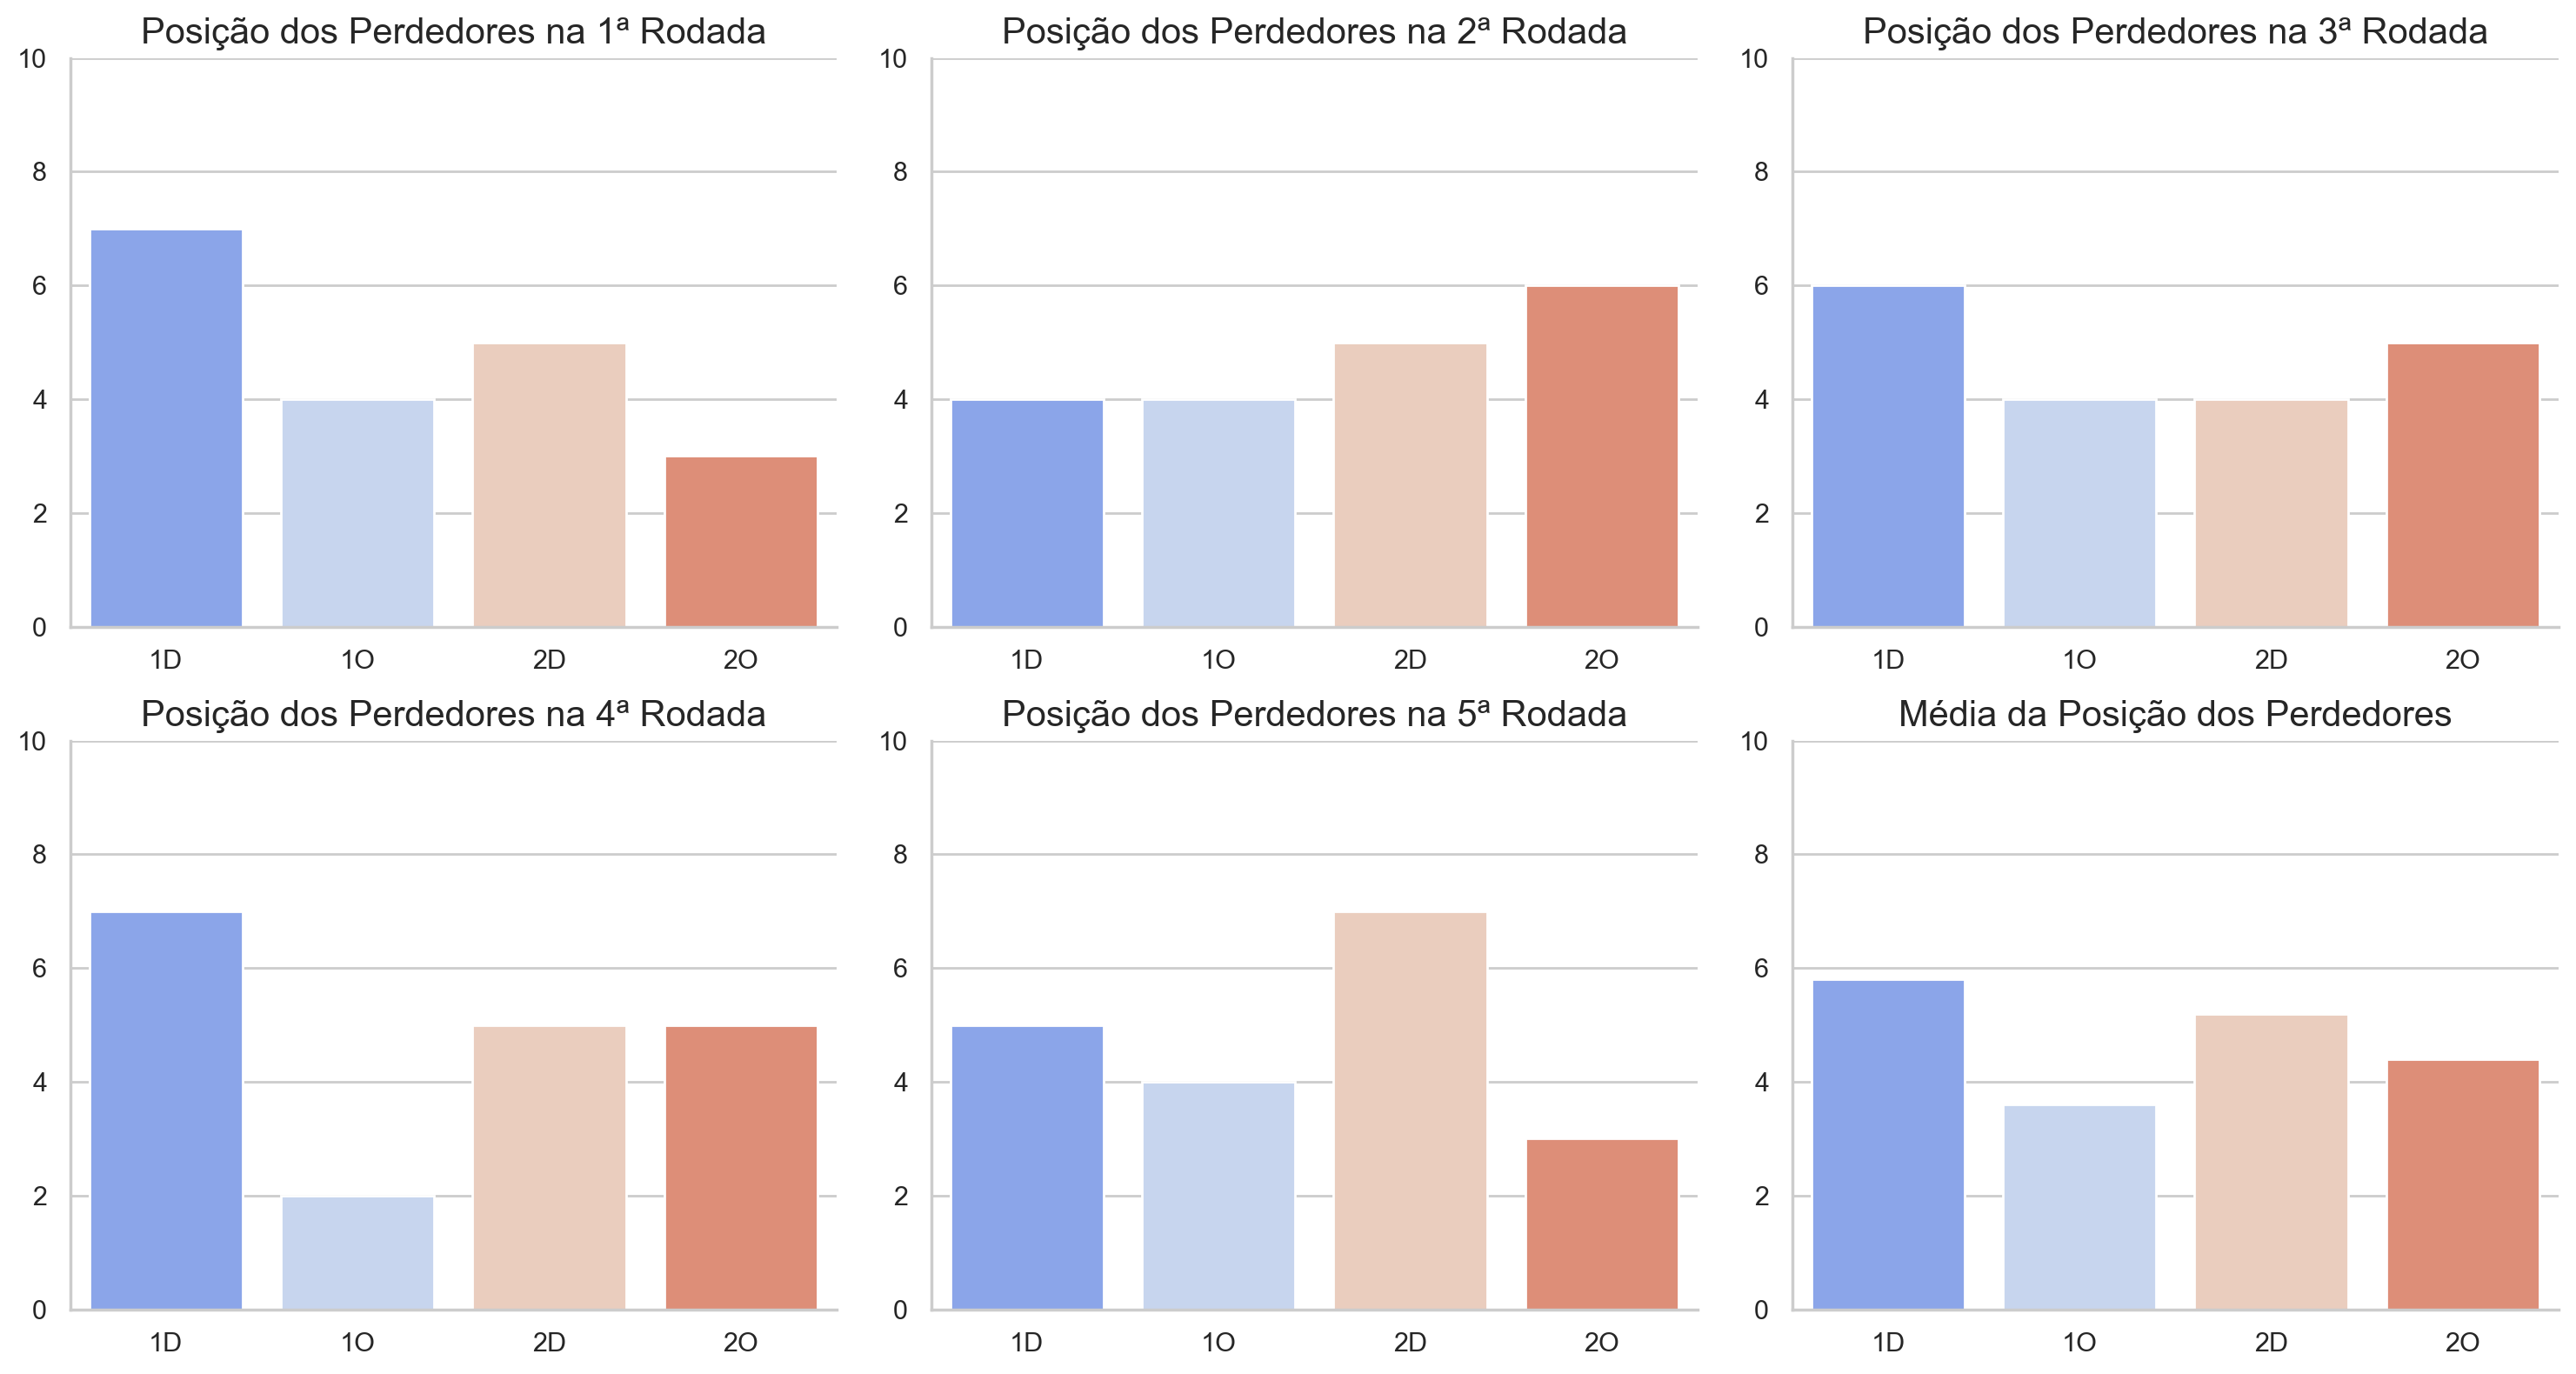

In [6]:
qtd=0
qt=0
q=0
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
plt.figure(figsize=(15,8),dpi=200)
for key,value in {'Ponto1':'1ª Rodada','Ponto2':'2ª Rodada','Ponto3':'3ª Rodada','Ponto4':'4ª Rodada','Ponto5':'5ª Rodada'}.items():
    perdedoras_rodada=list(set(vopen[vopen[key]==1]['ID'].tolist()))
    perdedoras_rodada_por_posicao=[]
    lista=[]
    for posicao in ['1D','1O','2D','2O']:
        perdedoras_posicao_rodada=0
        for dupla in perdedoras_rodada:
            if list(set(vopen[(vopen['Rodada']==value)&(vopen[posicao]==dupla)].count().tolist()))[0]==1:
                perdedoras_posicao_rodada+=1
        perdedoras_rodada_por_posicao.append(perdedoras_posicao_rodada)
        lista.append([value,posicao,perdedoras_posicao_rodada])
    k=np.array(perdedoras_rodada_por_posicao)
    qtd+=1
    if qtd==1:
        perdedoras_classificatorias_por_posicao=k
        lista1=lista
        lista1=np.array((lista1)).reshape(4,3)
        df_perdedoras=pd.DataFrame(data=lista1[:,:],columns=['Posição dos Perdedores','Posição','Perdedores'])
    elif qtd==2:
        perdedoras_classificatorias_por_posicao+=k
        lista2=lista
        lista2=np.array((lista2)).reshape(4,3)
        for i in range(0,4):
            df_perdedoras.loc[i+5]=lista2[i,:]
    elif qtd==3:
        perdedoras_classificatorias_por_posicao+=k
        lista3=lista
        lista3=np.array((lista3)).reshape(4,3)
        for i in range(0,4):
            df_perdedoras.loc[i+9]=lista3[i,:]        
    elif qtd==4:
        perdedoras_classificatorias_por_posicao+=k
        lista4=lista
        lista4=np.array((lista4)).reshape(4,3)
        for i in range(0,4):
            df_perdedoras.loc[i+13]=lista4[i,:]           
    elif qtd==5:
        perdedoras_classificatorias_por_posicao+=k
        lista5=lista
        lista5=np.array((lista5)).reshape(4,3)      
        for i in range(0,4):
            df_perdedoras.loc[i+17]=lista5[i,:]  
    df_perdedoras['Perdedores']=df_perdedoras['Perdedores'].astype('int32')
    plt.subplot(2,3,qtd)
    a=sns.barplot(x='Posição',y='Perdedores',data=df_perdedoras[df_perdedoras['Posição dos Perdedores']==value],palette='coolwarm')
    a.set_ylim([0,10])
    a.set_title('Posição dos Perdedores na '+value,size=15)
    a.set(ylabel='',xlabel='')
for i in df_perdedoras.groupby('Posição').mean()['Perdedores'].tolist():
    qt+=1
    if qt==1:
        lista6.append(['Média','1D',i])
    elif qt==2:
        lista6.append(['Média','1O',i])
    elif qt==3:
        lista6.append(['Média','2D',i])
    elif qt==4:
        lista6.append(['Média','2O',i])
qtd=6
if qtd==6:
    lista6=np.array((lista6)).reshape(4,3)
    for i in range(0,4):
        df_perdedoras.loc[i+21]=lista6[i,:]
df_perdedoras['Perdedores']=df_perdedoras['Perdedores'].astype('float32')
for i in df_perdedoras.groupby('Posição').std()['Perdedores'].tolist():
    q+=1
    if q==1:
        lista7.append(['Desvio Padrão','1D',i])
    elif q==2:
        lista7.append(['Desvio Padrão','1O',i])
    elif q==3:
        lista7.append(['Desvio Padrão','2D',i])
    elif q==4:
        lista7.append(['Desvio Padrão','2O',i])
qtd=7
if qtd==7:
    lista7=np.array((lista7)).reshape(4,3)
    for i in range(0,4):
        df_perdedoras.loc[i+25]=lista7[i,:]
df_perdedoras['Perdedores']=df_perdedoras['Perdedores'].astype('float32')
plt.subplot(2,3,6)
f=sns.barplot(x='Posição',y='Perdedores',data=df_perdedoras[df_perdedoras['Posição dos Perdedores']=='Média'],palette='coolwarm')
f.set_ylim([0,10])
f.set_title('Média da Posição dos Perdedores',size=15)
f.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Resumindo:

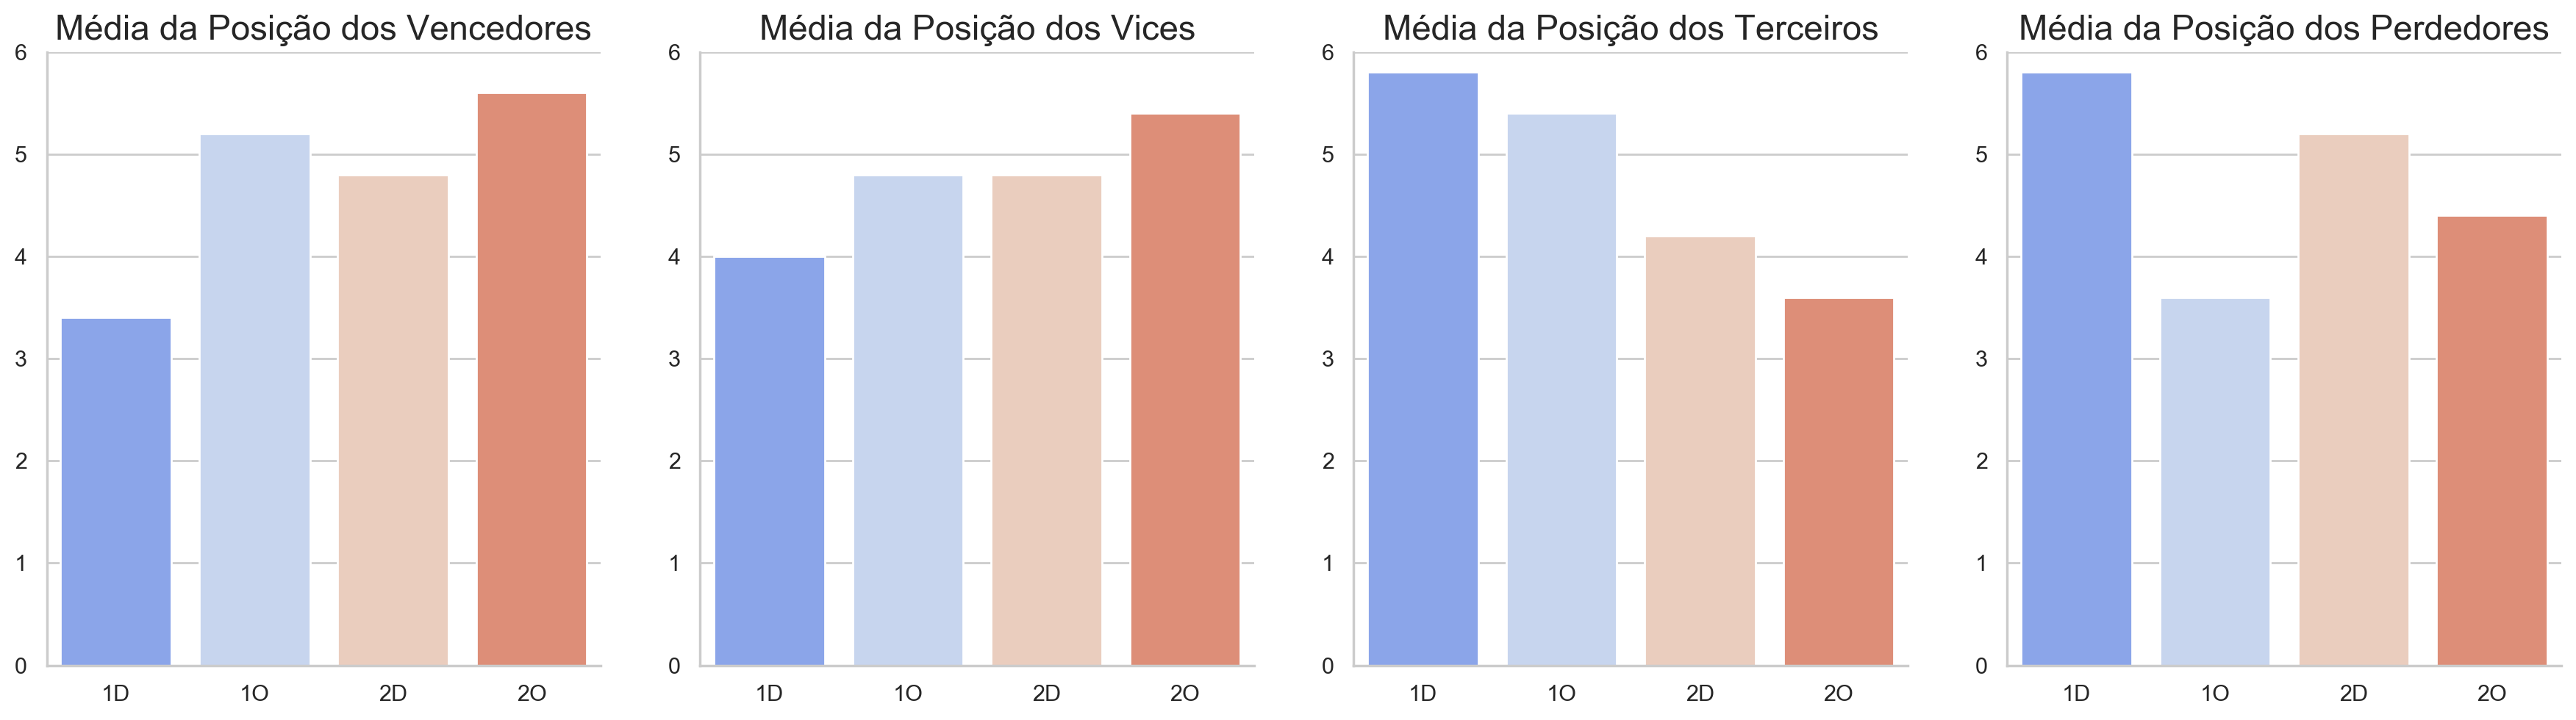

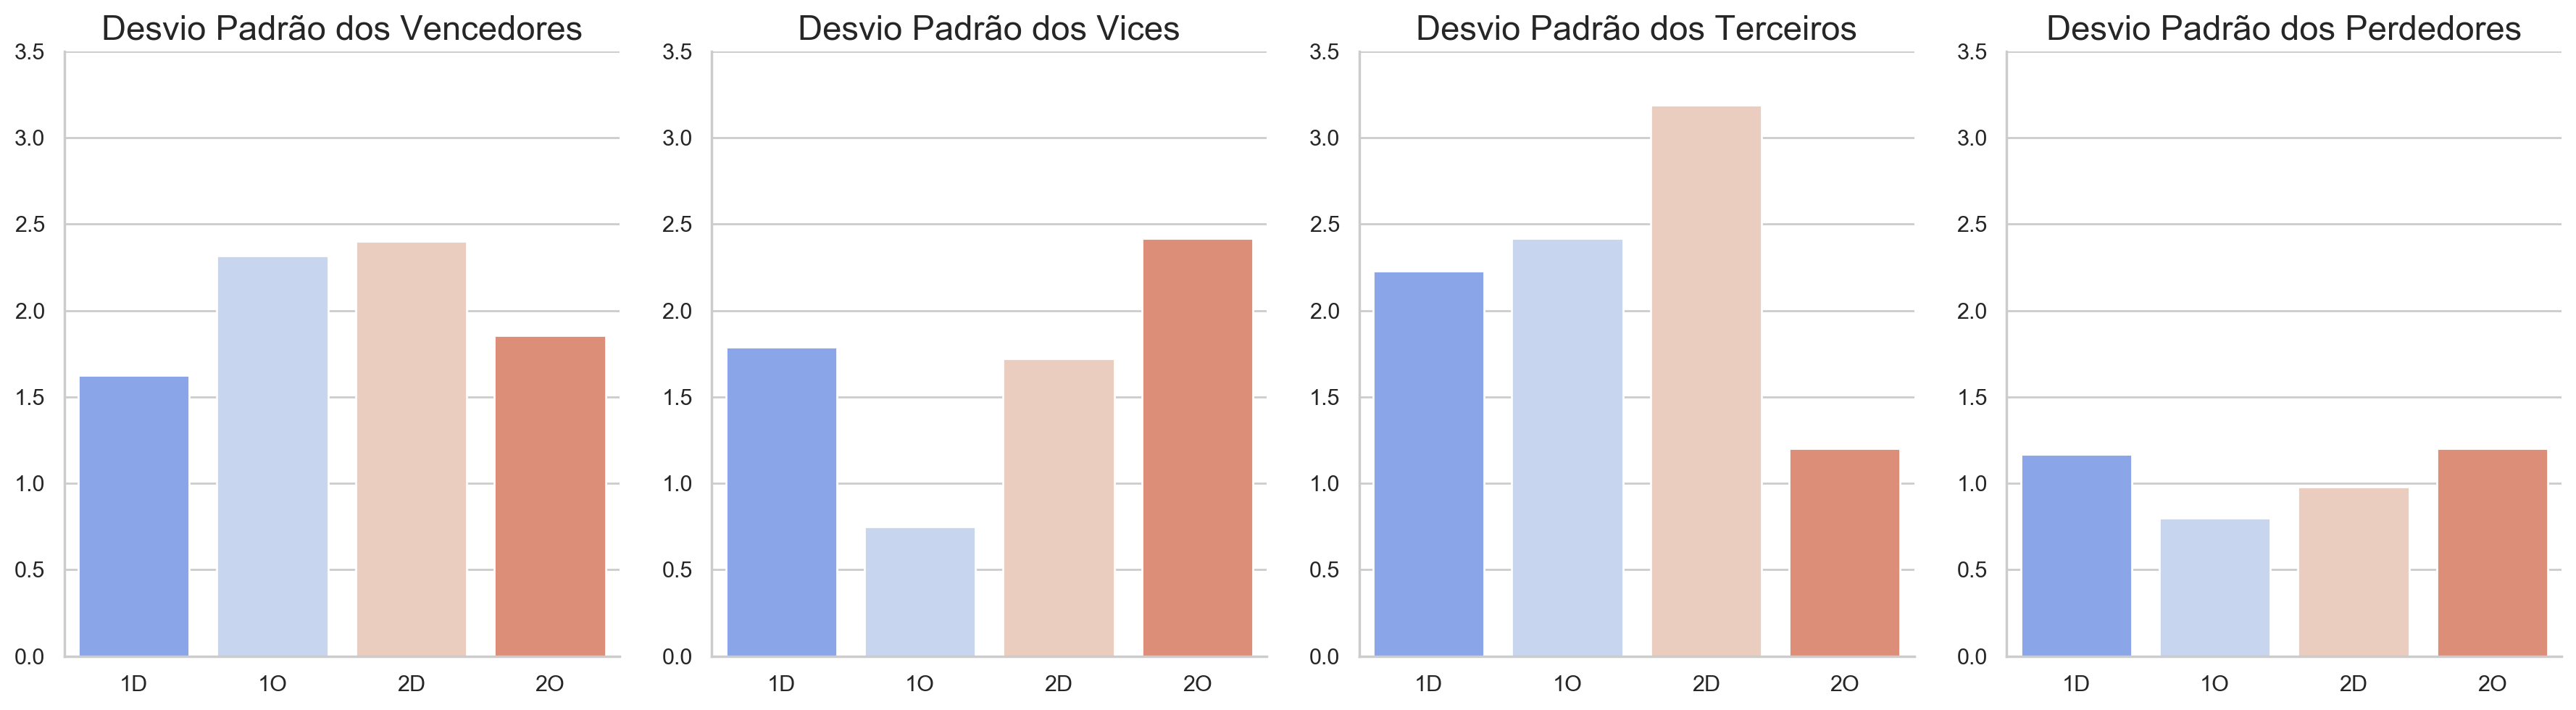

In [7]:
plt.figure(figsize=(18,5),dpi=200)
plt.subplot(1,4,1)
a=sns.barplot(x='Posição',y='Vitórias',data=df_vitorias[df_vitorias['Posição dos Vencedores']=='Média'],palette='coolwarm')
a.set_ylim([0,6])
a.set_title('Média da Posição dos Vencedores',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,2)
a=sns.barplot(x='Posição',y='Vices',data=df_vices[df_vices['Posição dos Vices']=='Média'],palette='coolwarm')
a.set_ylim([0,6])
a.set_title('Média da Posição dos Vices',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,3)
a=sns.barplot(x='Posição',y='Terceiros',data=df_terceiros[df_terceiros['Posição dos Terceiros']=='Média'],palette='coolwarm')
a.set_ylim([0,6])
a.set_title('Média da Posição dos Terceiros',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,4)
a=sns.barplot(x='Posição',y='Perdedores',data=df_perdedoras[df_perdedoras['Posição dos Perdedores']=='Média'],palette='coolwarm')
a.set_ylim([0,6])
a.set_title('Média da Posição dos Perdedores',size=17)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(18,5),dpi=200)
plt.subplot(1,4,1)
a=sns.barplot(x='Posição',y='Vitórias',data=df_vitorias[df_vitorias['Posição dos Vencedores']=='Desvio Padrão'],palette='coolwarm')
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão dos Vencedores',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,2)
a=sns.barplot(x='Posição',y='Vices',data=df_vices[df_vices['Posição dos Vices']=='Desvio Padrão'],palette='coolwarm')
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão dos Vices',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,3)
a=sns.barplot(x='Posição',y='Terceiros',data=df_terceiros[df_terceiros['Posição dos Terceiros']=='Desvio Padrão'],palette='coolwarm')
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão dos Terceiros',size=17)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,4)
a=sns.barplot(x='Posição',y='Perdedores',data=df_perdedoras[df_perdedoras['Posição dos Perdedores']=='Desvio Padrão'],palette='coolwarm')
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão dos Perdedores',size=17)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

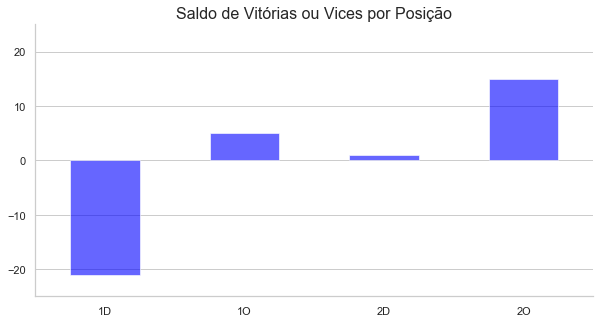

In [121]:
soma_vitorias=df_vitorias.drop([21,22,23,24,25,26,27,28]).groupby('Posição').sum()
soma_vices=df_vices.drop([21,22,23,24,25,26,27,28]).groupby('Posição').sum()
saldo_vitoriosos=np.array(soma_vitorias)+np.array(soma_vices)
soma_terceiros=df_terceiros.drop([21,22,23,24,25,26,27,28]).groupby('Posição').sum()
soma_perdedoras=df_perdedoras.drop([21,22,23,24,25,26,27,28]).groupby('Posição').sum()
saldo_derrotados=np.array(soma_terceiros)+np.array(soma_perdedoras)
saldo_posicoes=saldo_vitoriosos-saldo_derrotados.tolist()
saldo_total=[]
qtd=0
for i in saldo_posicoes:
    qtd+=1
    if qtd==1:
        saldo_total.append(['1D',int(i)])
    if qtd==2:
        saldo_total.append(['1O',int(i)])
    if qtd==3:
        saldo_total.append(['2D',int(i)])
    if qtd==4:
        saldo_total.append(['2O',int(i)])
saldo=pd.DataFrame(saldo_total,columns=['Posição','Frequência'])
saldo.set_index('Posição',inplace=True)
k=saldo.plot(kind='bar',rot=360,color='blue',alpha=0.6,figsize=(10,5),legend=False)
k.set(xlabel='',ylim=(-25,25))
k.set_title('Saldo de Vitórias ou Vices por Posição',fontsize=16)
k.grid(axis='x',b=False)
k.grid(axis='y',b=True)
sns.despine()
plt.show()

Na bancada da defesa, a melhor posição é com a 2D

Na bancada da oposição, a melhor posição é com a 2O

Na primeira metade, a melhor posição é 1O

Na segunda metade, a melhor posição é 2O

## Estratégia de Cartel

Em debates competitivos, cartel é a alinça tácita entre duas dupla, para que ambas fiquem nas primeiras posições

Embora o cartel pressuponha intenção, o cartel aqui foi medido como duplas que ganharam (ou perderam) conjuntamente na mesma sala

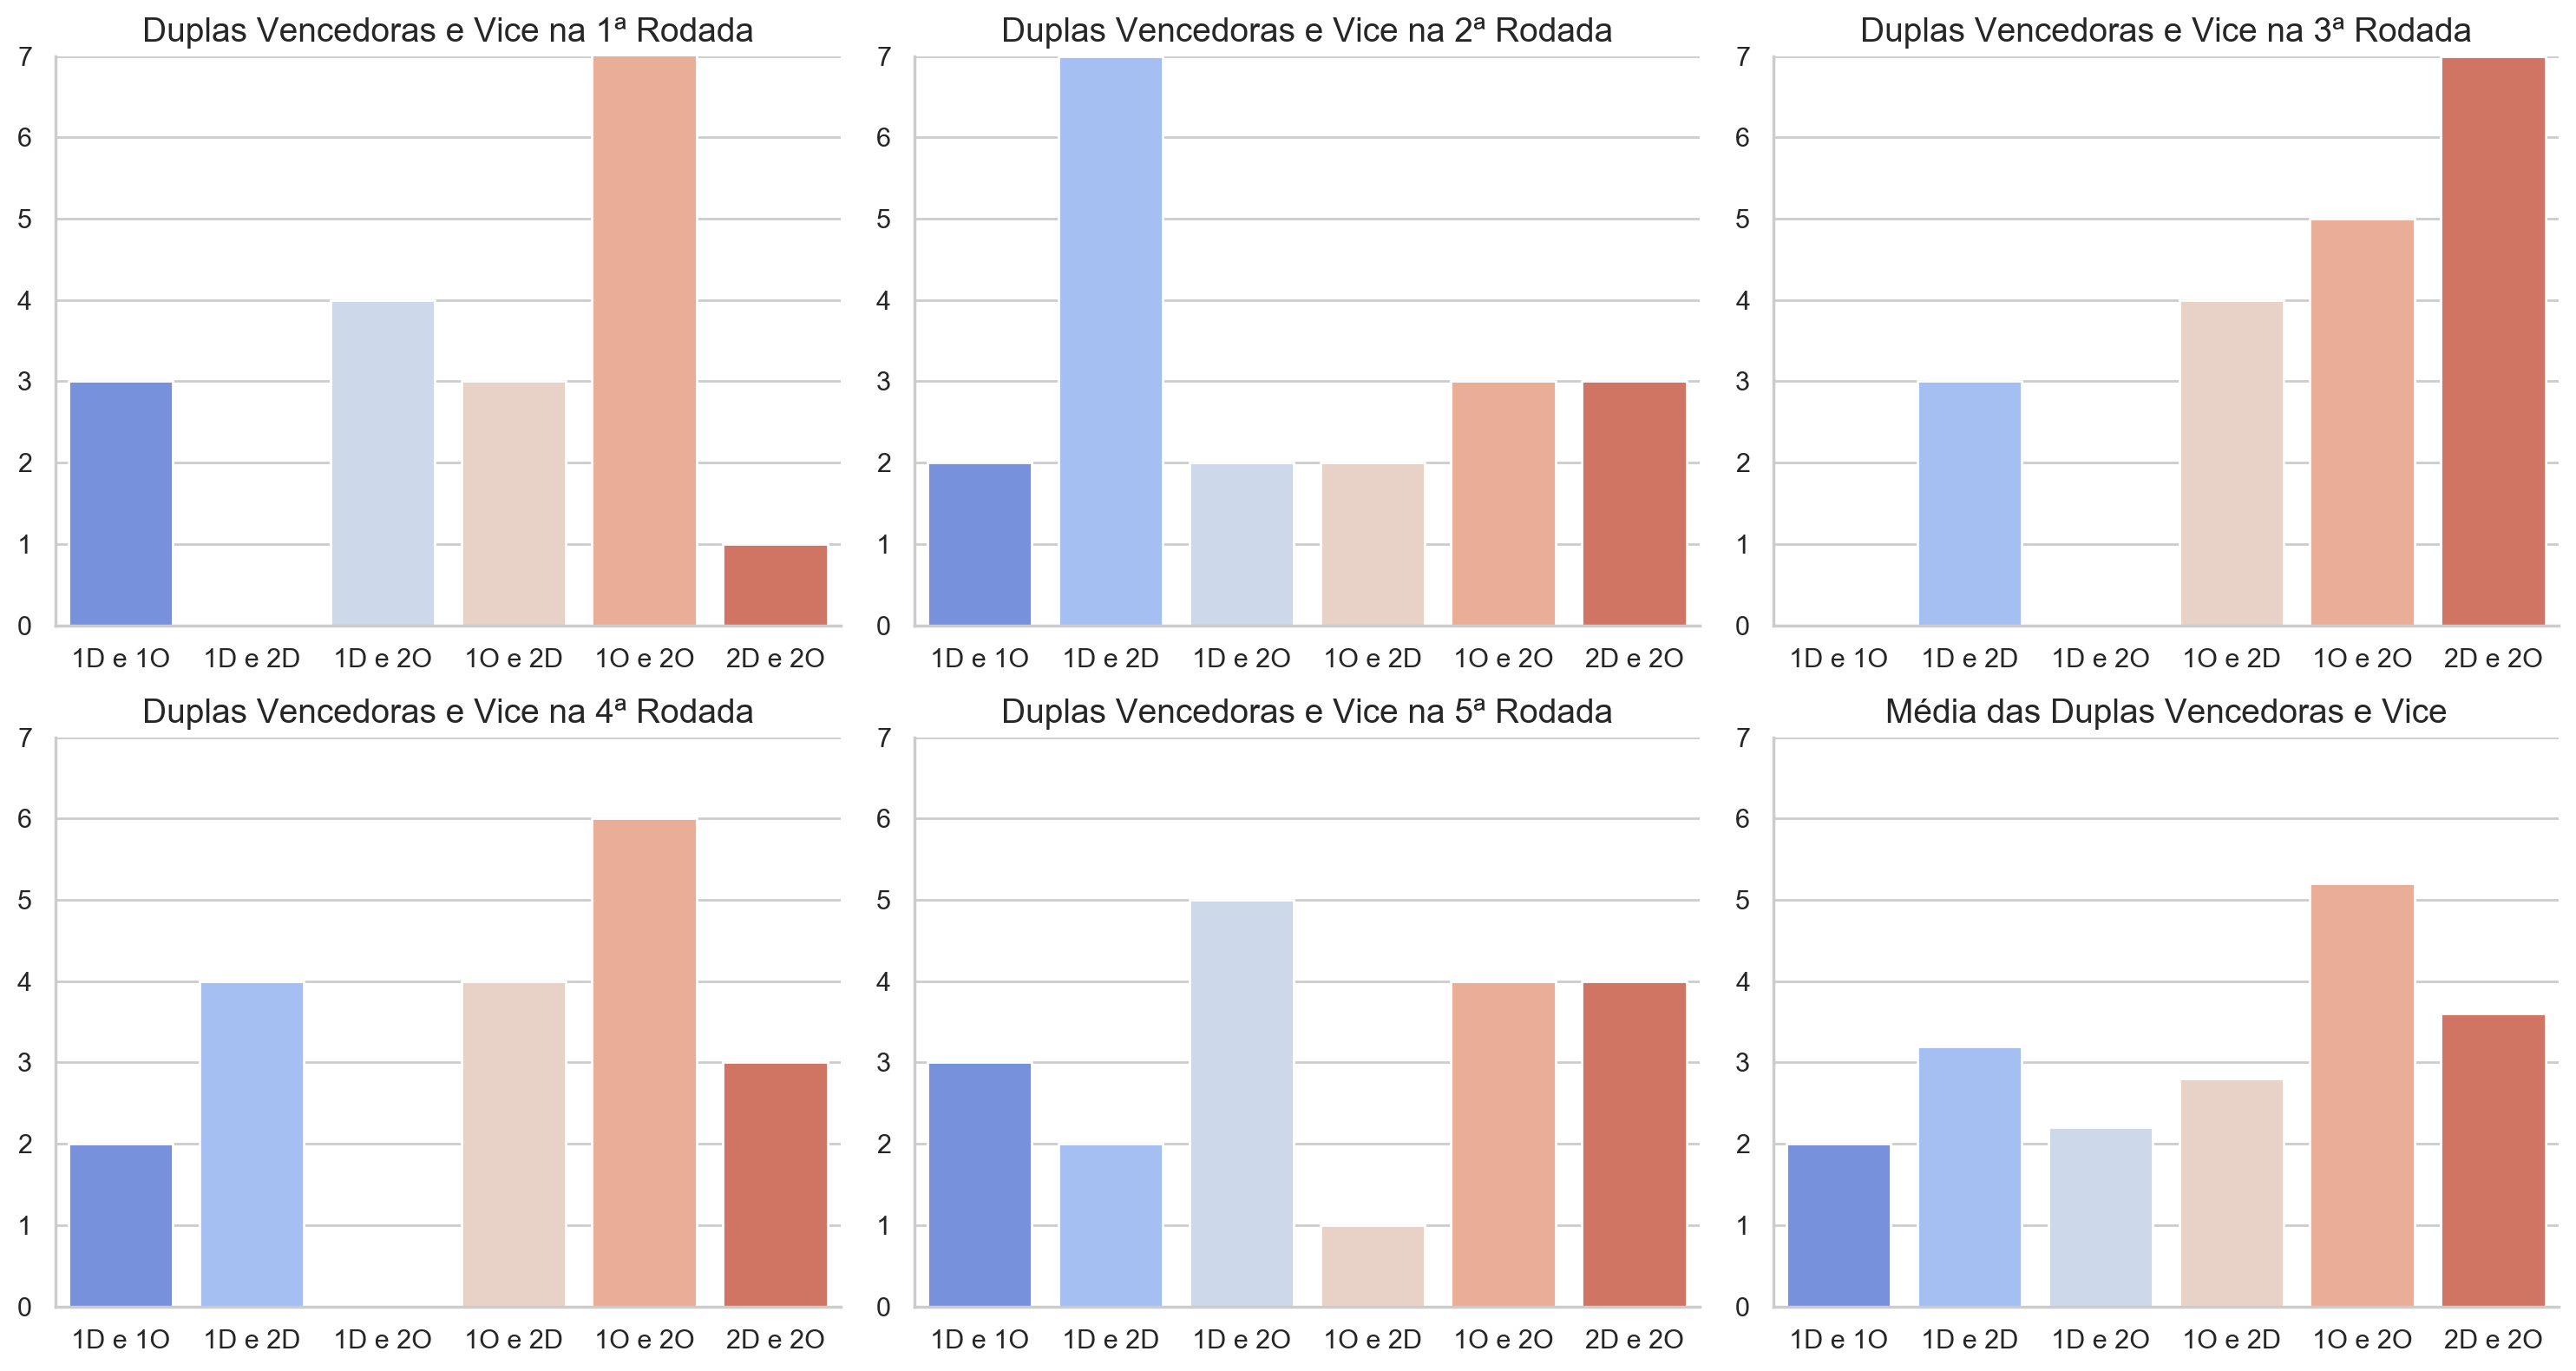

In [9]:
qtd=0
std1=[]
std2=[]
std3=[]
std4=[]
std5=[]
std6=[]
plt.figure(figsize=(15,8),dpi=200)
posicao_classificatorias_vencedores_vices=[]
for key,value in {'Ponto1':['1ª Rodada','Sala1'],'Ponto2':['2ª Rodada','Sala2'],'Ponto3':['3ª Rodada','Sala3'],'Ponto4':['4ª Rodada','Sala4'],'Ponto5':['5ª Rodada','Sala5']}.items():
    posicao_vencedores_vices=[]
    for sala in list(set(vopen[value[1]])):
        vencedoras_rodada=list(set(vopen[(vopen[key]==4)&(vopen[value[1]]==sala)]['ID'].tolist()))
        vices_rodada=list(set(vopen[(vopen[key]==3)&(vopen[value[1]]==sala)]['ID'].tolist()))
        for posicao in ['1D','1O','2D','2O']:
            if (vopen[(vopen[posicao]==vencedoras_rodada[0])&(vopen['Rodada']==value[0])][posicao]==vencedoras_rodada[0]).any()==True:
                posicao_vencedora=posicao
            if (vopen[(vopen[posicao]==vices_rodada[0])&(vopen['Rodada']==value[0])][posicao]==vices_rodada[0]).any()==True:
                posicao_vice=posicao
        posicao_vencedores_vices.append([value[0],sala,posicao_vencedora+' e '+posicao_vice])
        posicao_classificatorias_vencedores_vices.append([value[0],sala,posicao_vencedora+' e '+posicao_vice])
    df2=pd.DataFrame(posicao_vencedores_vices,columns=['Rodada','Sala','Duplas Vencedoras e Vice na mesma sala'])
    df2.replace(to_replace='2D e 1O',value='1O e 2D',inplace=True)
    df2.replace(to_replace='2O e 1D',value='1D e 2O',inplace=True)
    df2.replace(to_replace='2O e 1O',value='1O e 2O',inplace=True)
    df2.replace(to_replace='1O e 1D',value='1D e 1O',inplace=True)
    df2.replace(to_replace='2O e 2D',value='2D e 2O',inplace=True)
    df2.replace(to_replace='2D e 1D',value='1D e 2D',inplace=True)
    qtd+=1
    plt.subplot(2,3,qtd)
    a=sns.countplot(x='Duplas Vencedoras e Vice na mesma sala',data=df2,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
    a.set_ylim([0,7])
    a.set_title('Duplas Vencedoras e Vice na '+value[0],fontsize=14)
    a.set(ylabel='',xlabel='')
    std1.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1D e 1O')].count().iloc[0]-2.0)**2)
    std2.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1D e 2D')].count().iloc[0]-3.2)**2)
    std3.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1D e 2O')].count().iloc[0]-2.2)**2)
    std4.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1O e 2D')].count().iloc[0]-2.8)**2)
    std5.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='1O e 2O')].count().iloc[0]-5.2)**2)
    std6.append((df2[(df2['Rodada']==value[0])&(df2['Duplas Vencedoras e Vice na mesma sala']=='2D e 2O')].count().iloc[0]-3.6)**2)
std1=(sum(std1)/5)**(1/2)
std2=(sum(std2)/5)**(1/2)
std3=(sum(std3)/5)**(1/2)
std4=(sum(std4)/5)**(1/2)
std5=(sum(std5)/5)**(1/2)
std6=(sum(std6)/5)**(1/2)
std=[['1D e 1O',std1],['1D e 2D',std2],['1D e 2O',std3],['1O e 2D',std4],['1O e 2O',std5],['2D e 2O',std6]]
std_2=pd.DataFrame(std,columns=['Duplas Vencedoras e Vice na mesma sala','Desvio Padrão'])
df2=pd.DataFrame(posicao_classificatorias_vencedores_vices,columns=['Rodada','Sala','Duplas Vencedoras e Vice na mesma sala'])
df2.replace(to_replace='2D e 1O',value='1O e 2D',inplace=True)
df2.replace(to_replace='2O e 1D',value='1D e 2O',inplace=True)
df2.replace(to_replace='2O e 1O',value='1O e 2O',inplace=True)
df2.replace(to_replace='1O e 1D',value='1D e 1O',inplace=True)
df2.replace(to_replace='2O e 2D',value='2D e 2O',inplace=True)
df2.replace(to_replace='2D e 1D',value='1D e 2D',inplace=True)
media_2=df2.groupby('Duplas Vencedoras e Vice na mesma sala').count()/5
media_2['Duplas Vencedoras e Vice na mesma sala']=media_2.index
plt.subplot(2,3,6)
a=sns.barplot(x='Duplas Vencedoras e Vice na mesma sala',y='Rodada',data=media_2,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,7])
a.set_title('Média das Duplas Vencedoras e Vice',fontsize=14)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

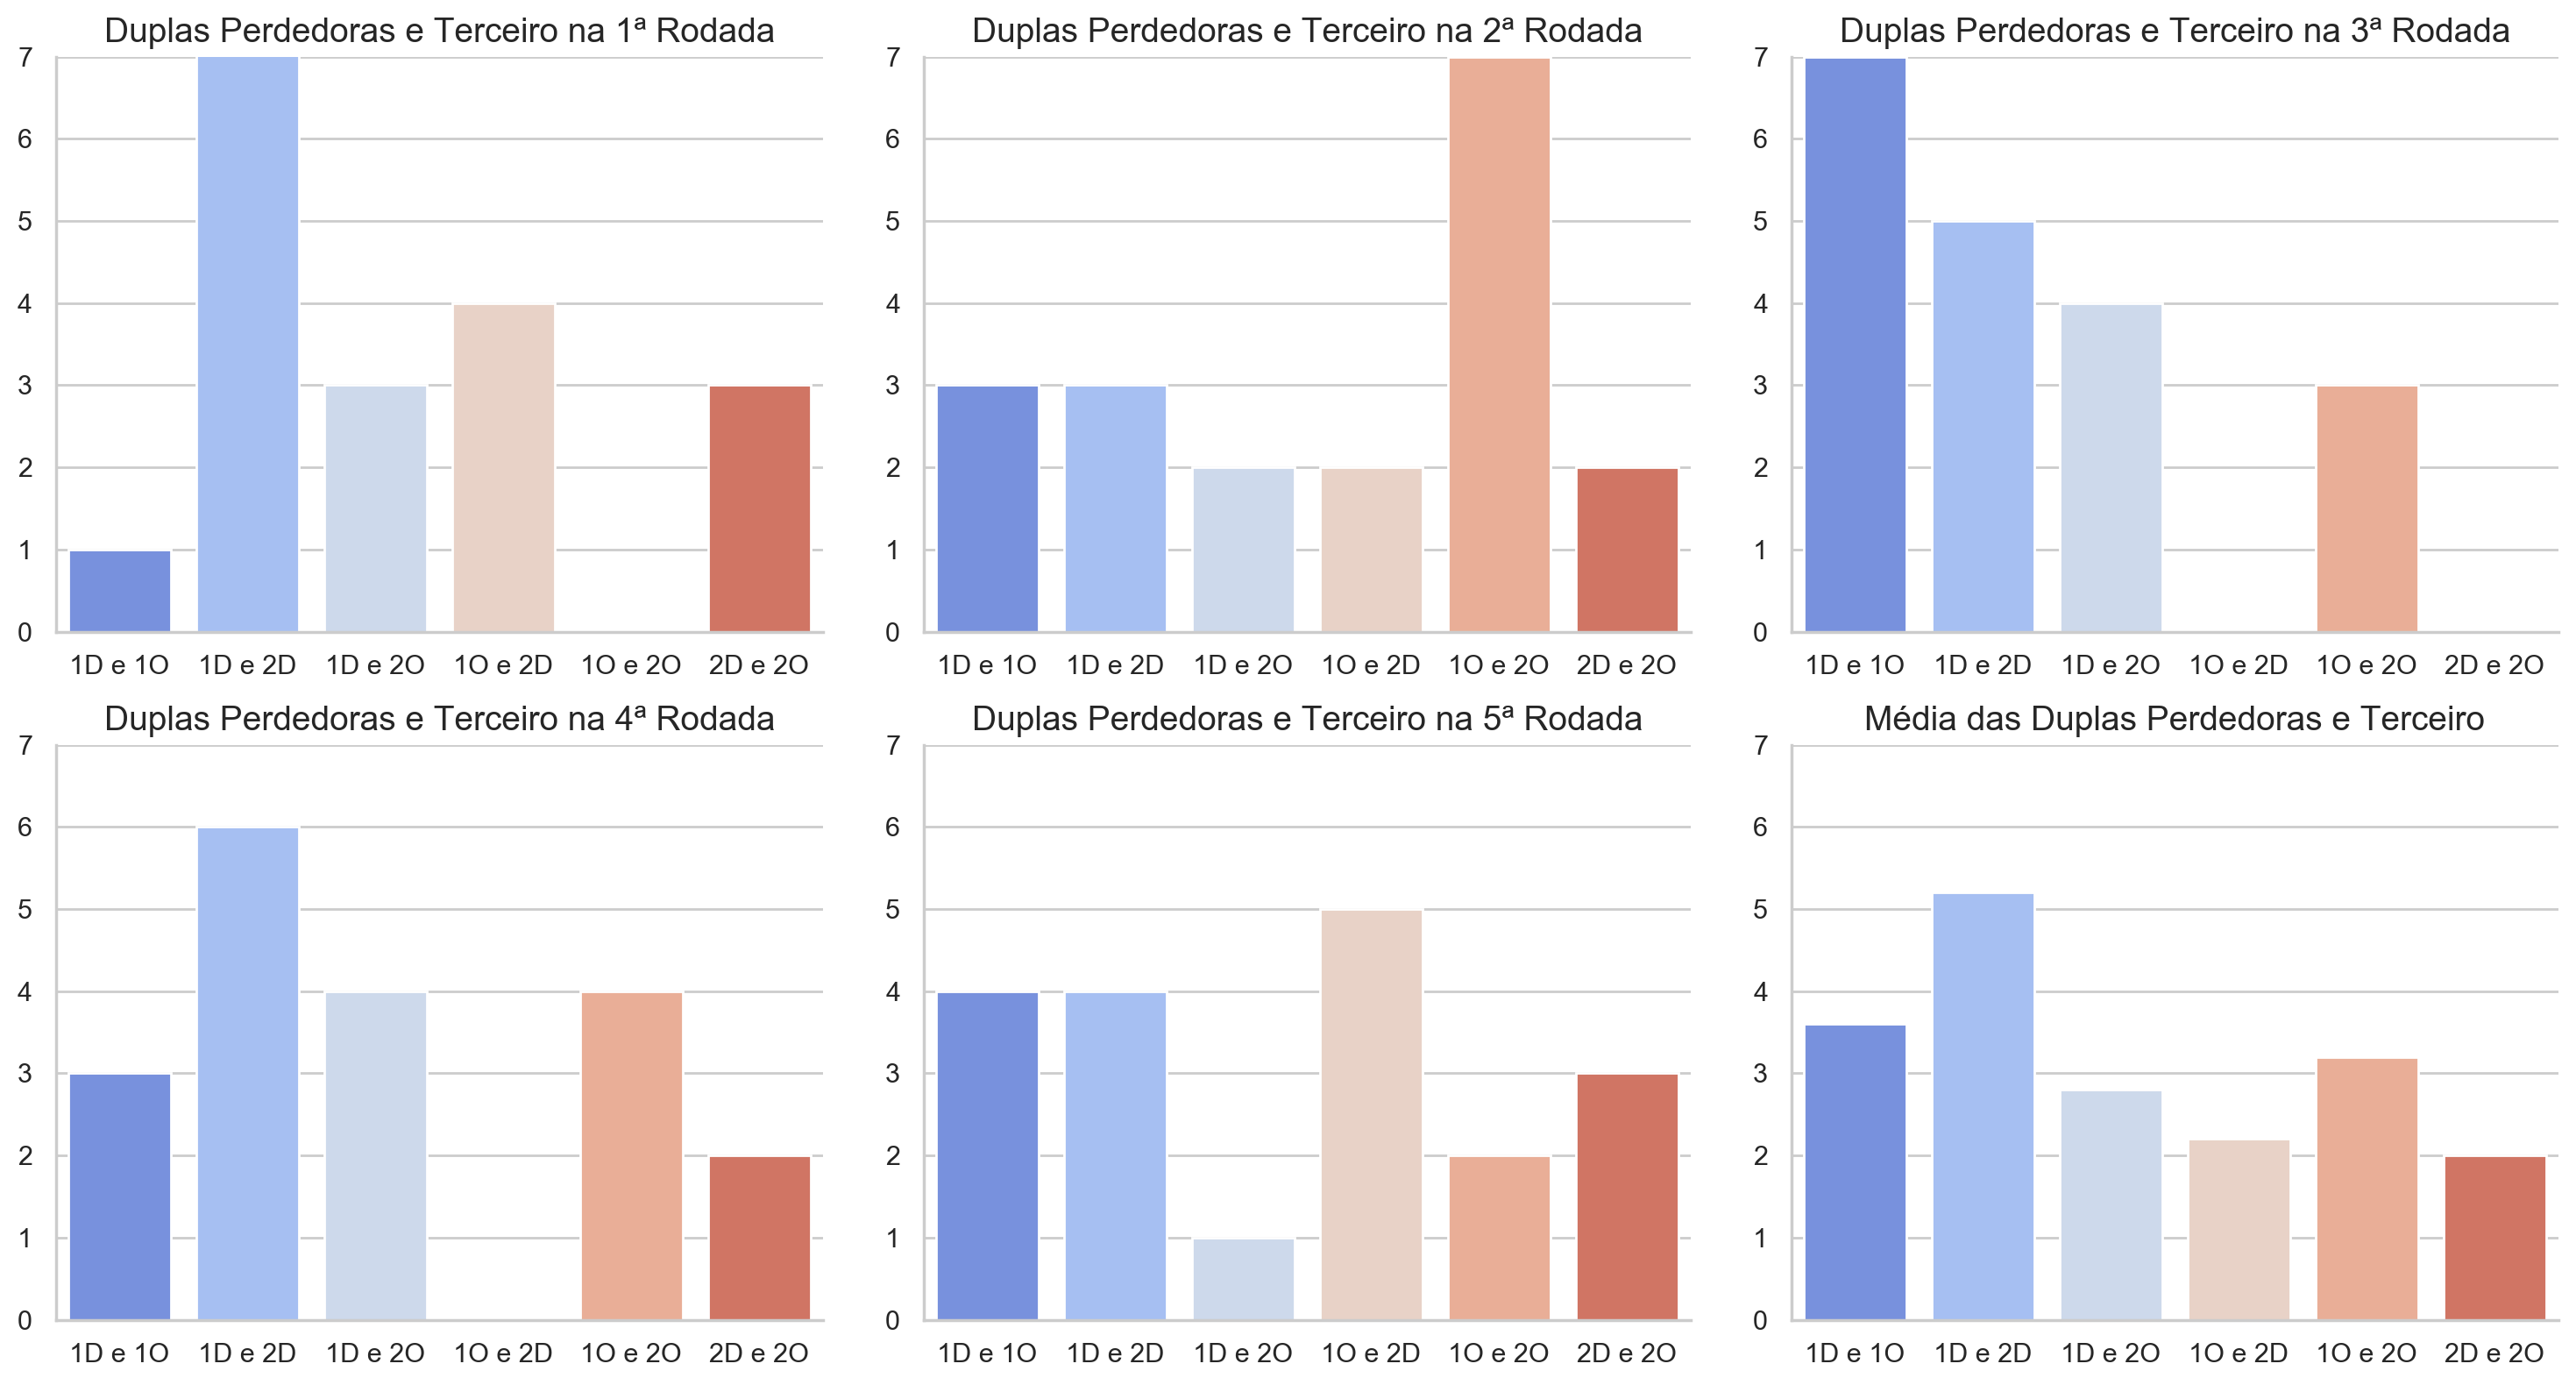

In [10]:
qtd=0
std1=[]
std2=[]
std3=[]
std4=[]
std5=[]
std6=[]
plt.figure(figsize=(15,8),dpi=200)
posicao_classificatorias_terceiros_perdedoras=[]
for key,value in {'Ponto1':['1ª Rodada','Sala1'],'Ponto2':['2ª Rodada','Sala2'],'Ponto3':['3ª Rodada','Sala3'],'Ponto4':['4ª Rodada','Sala4'],'Ponto5':['5ª Rodada','Sala5']}.items():
    posicao_terceiros_perdedoras=[]
    for sala in list(set(vopen[value[1]])):
        terceiros_rodada=list(set(vopen[(vopen[key]==2)&(vopen[value[1]]==sala)]['ID'].tolist()))
        perdedoras_rodada=list(set(vopen[(vopen[key]==1)&(vopen[value[1]]==sala)]['ID'].tolist()))
        for posicao in ['1D','1O','2D','2O']:
            if (vopen[(vopen[posicao]==terceiros_rodada[0])&(vopen['Rodada']==value[0])][posicao]==terceiros_rodada[0]).any()==True:
                posicao_terceiro=posicao
            if (vopen[(vopen[posicao]==perdedoras_rodada[0])&(vopen['Rodada']==value[0])][posicao]==perdedoras_rodada[0]).any()==True:
                posicao_perdedora=posicao
        #print('Na sala',sala,'da',value[0],'a dupla',terceiros_rodada[0],'tirou terceiro e estava na',posicao_terceiro,'e a dupla',perdedoras_rodada[0],'perdeu e estava na',posicao_perdedora)
        posicao_terceiros_perdedoras.append([value[0],sala,posicao_terceiro+' e '+posicao_perdedora])
        posicao_classificatorias_terceiros_perdedoras.append([value[0],sala,posicao_terceiro+' e '+posicao_perdedora])
    df3=pd.DataFrame(posicao_terceiros_perdedoras,columns=['Rodada','Sala','Duplas Perdedoras e Terceiro na mesma sala'])
    df3.replace(to_replace='2D e 1O',value='1O e 2D',inplace=True)
    df3.replace(to_replace='2O e 1D',value='1D e 2O',inplace=True)
    df3.replace(to_replace='2O e 1O',value='1O e 2O',inplace=True)
    df3.replace(to_replace='1O e 1D',value='1D e 1O',inplace=True)
    df3.replace(to_replace='2O e 2D',value='2D e 2O',inplace=True)
    df3.replace(to_replace='2D e 1D',value='1D e 2D',inplace=True)
    qtd+=1
    plt.subplot(2,3,qtd)
    a=sns.countplot(x='Duplas Perdedoras e Terceiro na mesma sala',data=df3,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
    a.set_ylim([0,7])
    a.set_title('Duplas Perdedoras e Terceiro na '+value[0],fontsize=14)
    a.set(ylabel='',xlabel='')
    std1.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1D e 1O')].count().iloc[0]-3.6)**2)
    std2.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1D e 2D')].count().iloc[0]-5.2)**2)
    std3.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1D e 2O')].count().iloc[0]-2.8)**2)
    std4.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1O e 2D')].count().iloc[0]-2.2)**2)
    std5.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='1O e 2O')].count().iloc[0]-3.2)**2)
    std6.append((df3[(df3['Rodada']==value[0])&(df3['Duplas Perdedoras e Terceiro na mesma sala']=='2D e 2O')].count().iloc[0]-2.0)**2)
std1=(sum(std1)/5)**(1/2)
std2=(sum(std2)/5)**(1/2)
std3=(sum(std3)/5)**(1/2)
std4=(sum(std4)/5)**(1/2)
std5=(sum(std5)/5)**(1/2)
std6=(sum(std6)/5)**(1/2)
std=[['1D e 1O',std1],['1D e 2D',std2],['1D e 2O',std3],['1O e 2D',std4],['1O e 2O',std5],['2D e 2O',std6]]
std_3=pd.DataFrame(std,columns=['Duplas Perdedoras e Terceiro na mesma sala','Desvio Padrão'])    
df3=pd.DataFrame(posicao_classificatorias_terceiros_perdedoras,columns=['Rodada','Sala','Duplas Perdedoras e Terceiro na mesma sala'])
df3.replace(to_replace='2D e 1O',value='1O e 2D',inplace=True)
df3.replace(to_replace='2O e 1D',value='1D e 2O',inplace=True)
df3.replace(to_replace='2O e 1O',value='1O e 2O',inplace=True)
df3.replace(to_replace='1O e 1D',value='1D e 1O',inplace=True)
df3.replace(to_replace='2O e 2D',value='2D e 2O',inplace=True)
df3.replace(to_replace='2D e 1D',value='1D e 2D',inplace=True)
media_3=df3.groupby('Duplas Perdedoras e Terceiro na mesma sala').count()/5
media_3['Duplas Perdedoras e Terceiro na mesma sala']=media_3.index
plt.subplot(2,3,6)
a=sns.barplot(x='Duplas Perdedoras e Terceiro na mesma sala',y='Rodada',data=media_3,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,7])
a.set_title('Média das Duplas Perdedoras e Terceiro',fontsize=14)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

#### Agregando:

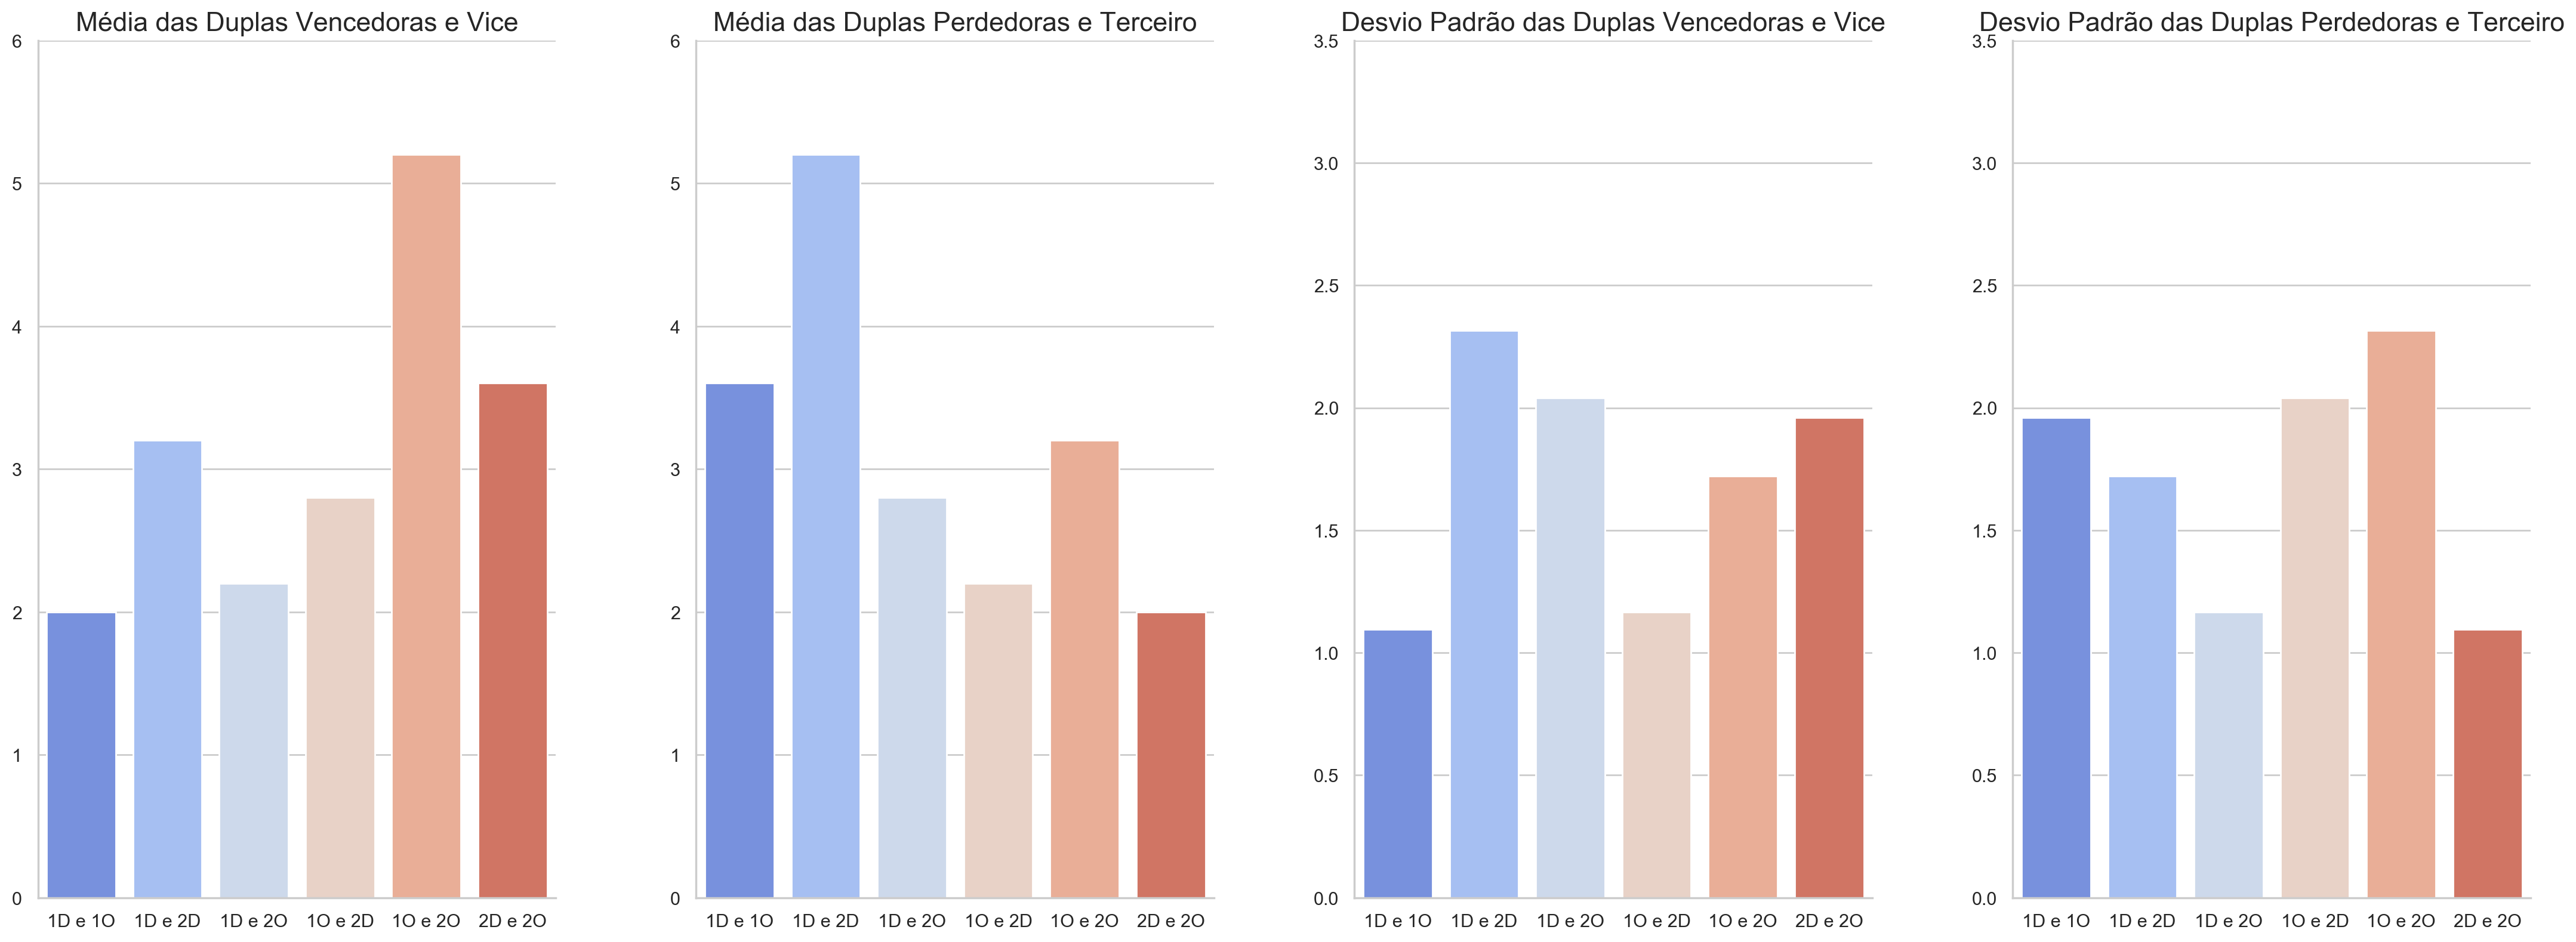

In [11]:
plt.figure(figsize=(22,8),dpi=200)
plt.subplot(1,4,1)
a=sns.barplot(x='Duplas Vencedoras e Vice na mesma sala',y='Rodada',data=media_2,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,6])
a.set_title('Média das Duplas Vencedoras e Vice',fontsize=16)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,2)
a=sns.barplot(x='Duplas Perdedoras e Terceiro na mesma sala',y='Rodada',data=media_3,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,6])
a.set_title('Média das Duplas Perdedoras e Terceiro',fontsize=16)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,3)
a=sns.barplot(x='Duplas Vencedoras e Vice na mesma sala',y='Desvio Padrão',data=std_2,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão das Duplas Vencedoras e Vice',fontsize=16)
a.set(ylabel='',xlabel='')
plt.subplot(1,4,4)
a=sns.barplot(x='Duplas Perdedoras e Terceiro na mesma sala',y='Desvio Padrão',data=std_3,order=['1D e 1O','1D e 2D','1D e 2O','1O e 2D','1O e 2O','2D e 2O'])
a.set_ylim([0,3.5])
a.set_title('Desvio Padrão das Duplas Perdedoras e Terceiro',fontsize=16)
a.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

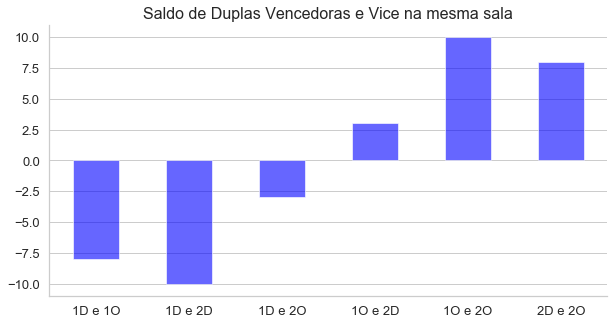

In [120]:
df4=(df2.groupby('Duplas Vencedoras e Vice na mesma sala').count()['Rodada']-df3.groupby('Duplas Perdedoras e Terceiro na mesma sala').count()['Rodada'])
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.tick_params(labelsize=13)
ax.set_title('Saldo de Duplas Vencedoras e Vice na mesma sala',fontsize=16)
plot=df4.plot(kind='bar',rot=360,color='blue',alpha=0.6)
plot.set(xlabel='')
plot.grid(axis='x',b=False)
plot.grid(axis='y',b=True)
sns.despine()
plt.show()

Para a 1D, o melhor cartel é com a 2O

Para a 1O, o melhor cartel é com a 2O (em muito!)

Para a 2D, o melhor cartel é com a 2O

Para a 2O, o melhor cartel é com a 1O (em muito!)

O carte da oposição é muito melhor que o da defesa

O cartel da segunda metade é muito melhor que o da primeira

O carte da diagonal curta é ligeiramente melhor que o da longa

Dado que a melhor escolha pra 1O é cartelizar com 2O (e vice-versa), estas duplas sempre farão cartel entre si

## Armadilha do Quarto Lugar
Uma percepção frequente em debates é que tirar quarto lugar na primeira rodada implica em permanecer com posições ruins ao longo do torneio. Independentemente do motivo que gere este fenômeno, testo aqui sua veracidade

In [36]:
vopen1=vopen.drop_duplicates(subset='ID')
vopen1.head()

ID                Nome       SD  Ponto1  Nota1  Sala1  Ponto2  Nota2  \
0   5       Arthur Gandra  Senatus       4     80      2       4     73   
1  29        Luísa Côrtes  Senatus       4     72      8       4     77   
2  14    João Lucas Lopes   SdDUFC       4     72      4       4     75   
4  54  Carolina Marcondes      SDV       4     80     14       1     70   
6  48       Fernanda Cruz  Senatus       3     75     12       4     76   

   Sala2  Ponto3  ...  Nota5  Sala5  Pontuação  Dificuldade  Nota Final  \
0     24       4  ...     82     79         17        59.75        77.2   
1     23       1  ...     76     79         16        57.00        77.2   
2     22       3  ...     72     77         17        57.00        77.0   
4     20       4  ...     70     81         14        54.50        76.6   
6     28       2  ...     80     81         15        55.25        76.2   

      Rodada  1D  1O  2D  2O  
0  1ª Rodada  33  34  35  36  
1  3ª Rodada  46  11  25   1  
2  2ª Rodada  20  51  62   2  
4          0   0   0   0   0  
6  5ª Rodada  49   6  31  58  

[5 rows x 26 columns]

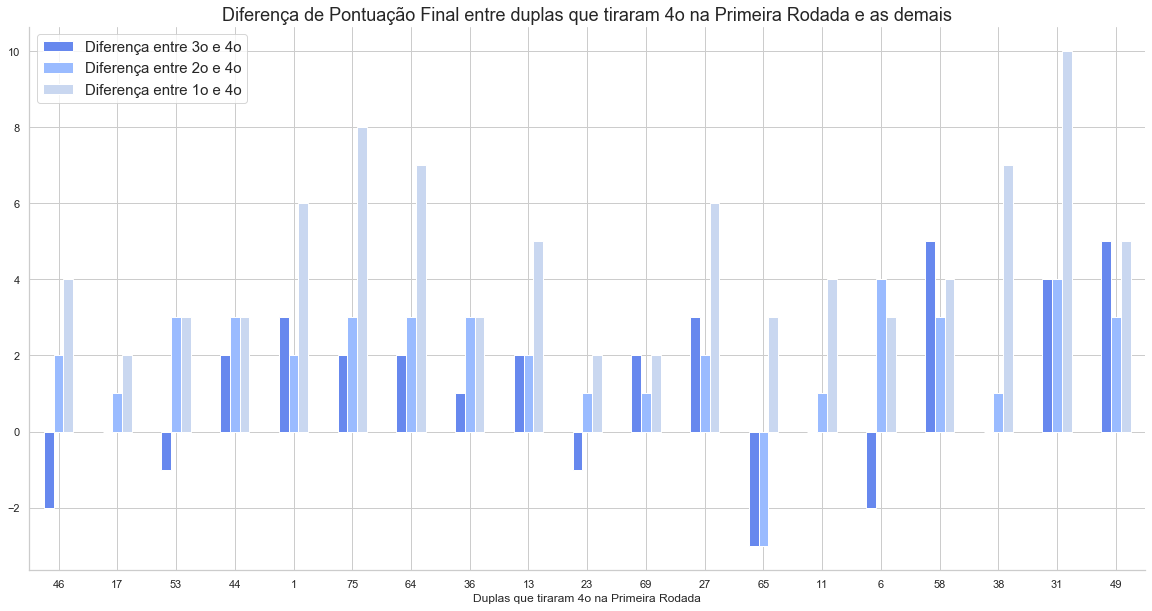

In [175]:
df10=pd.DataFrame(index=vopen1[vopen1['Ponto1']==1]['ID'])
df10.set_index(vopen1[vopen1['Ponto1']==1]['ID'],inplace=True)
df10['Diferença entre 3o e 4o']=(np.array(vopen1[vopen1['Ponto1']==2]['Pontuação'])-np.array(vopen1[vopen1['Ponto1']==1]['Pontuação'])).tolist()
df10['Diferença entre 2o e 4o']=(np.array(vopen1[vopen1['Ponto1']==3]['Pontuação'])-np.array(vopen1[vopen1['Ponto1']==1]['Pontuação'])).tolist()
df10['Diferença entre 1o e 4o']=(np.array(vopen1[vopen1['Ponto1']==4]['Pontuação'])-np.array(vopen1[vopen1['Ponto1']==1]['Pontuação'])).tolist()
k=df10.plot(kind='bar',rot=360,figsize=(20,10))
k.set(xlabel='Duplas que tiraram 4o na Primeira Rodada')
k.set_title('Diferença de Pontuação Final entre duplas que tiraram 4o na Primeira Rodada e as demais',fontsize=18)
k.legend(prop={'size':15})
sns.despine()
plt.show()

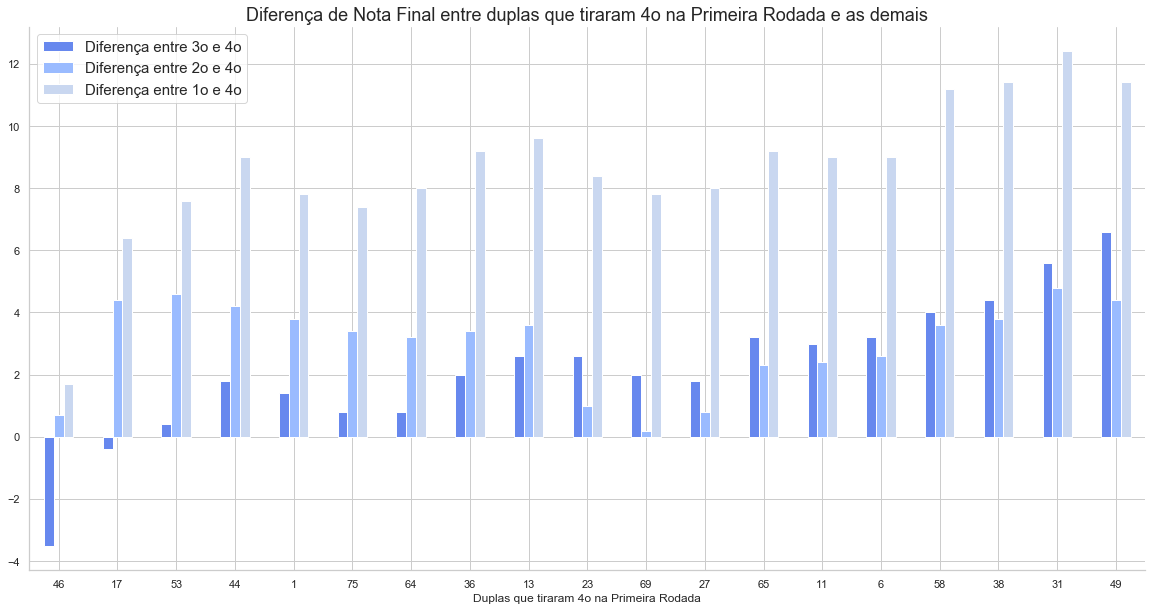

In [176]:
df10=pd.DataFrame(index=vopen1[vopen1['Ponto1']==1]['ID'])
df10.set_index(vopen1[vopen1['Ponto1']==1]['ID'],inplace=True)
df10['Diferença entre 3o e 4o']=(np.array(vopen1[vopen1['Ponto1']==2]['Nota Final'])-np.array(vopen1[vopen1['Ponto1']==1]['Nota Final'])).tolist()
df10['Diferença entre 2o e 4o']=(np.array(vopen1[vopen1['Ponto1']==3]['Nota Final'])-np.array(vopen1[vopen1['Ponto1']==1]['Nota Final'])).tolist()
df10['Diferença entre 1o e 4o']=(np.array(vopen1[vopen1['Ponto1']==4]['Nota Final'])-np.array(vopen1[vopen1['Ponto1']==1]['Nota Final'])).tolist()
k=df10.plot(kind='bar',rot=360,figsize=(20,10))
k.set(xlabel='Duplas que tiraram 4o na Primeira Rodada')
k.set_title('Diferença de Nota Final entre duplas que tiraram 4o na Primeira Rodada e as demais',fontsize=18)
k.legend(prop={'size':15})
sns.despine()
plt.show()

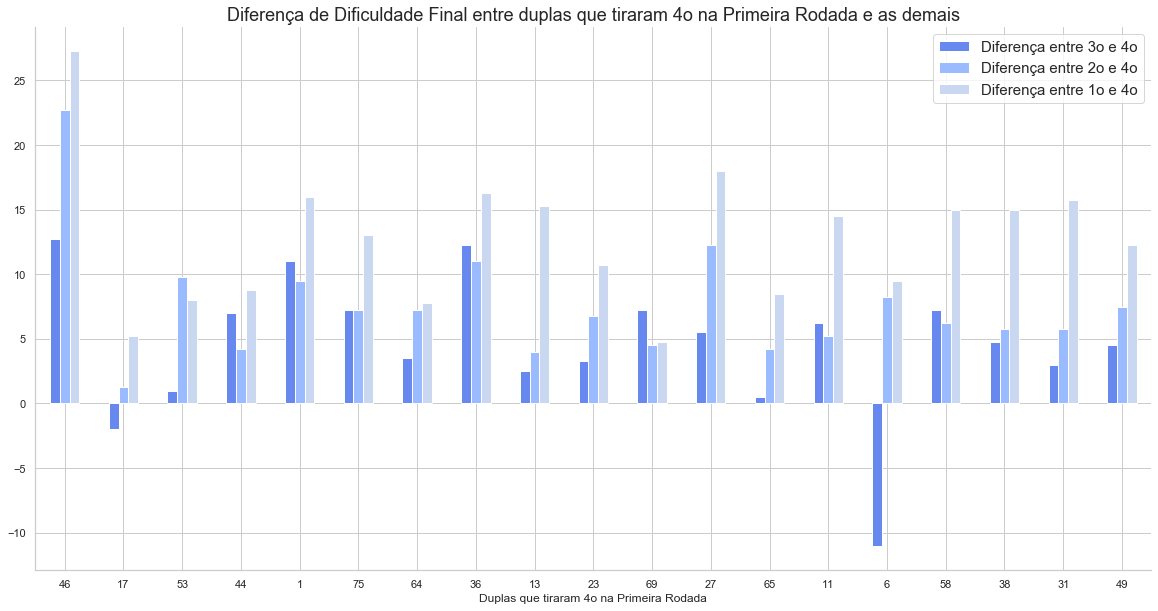

In [39]:
df10=pd.DataFrame(index=vopen1[vopen1['Ponto1']==1]['ID'])
df10.set_index(vopen1[vopen1['Ponto1']==1]['ID'],inplace=True)
df10['Diferença entre 3o e 4o']=(np.array(vopen1[vopen1['Ponto1']==2]['Dificuldade'])-np.array(vopen1[vopen1['Ponto1']==1]['Dificuldade'])).tolist()
df10['Diferença entre 2o e 4o']=(np.array(vopen1[vopen1['Ponto1']==3]['Dificuldade'])-np.array(vopen1[vopen1['Ponto1']==1]['Dificuldade'])).tolist()
df10['Diferença entre 1o e 4o']=(np.array(vopen1[vopen1['Ponto1']==4]['Dificuldade'])-np.array(vopen1[vopen1['Ponto1']==1]['Dificuldade'])).tolist()
k=df10.plot(kind='bar',rot=360,figsize=(20,10))
k.set(xlabel='Duplas que tiraram 4o na Primeira Rodada')
k.set_title('Diferença de Dificuldade Final entre duplas que tiraram 4o na Primeira Rodada e as demais',fontsize=18)
k.legend(prop={'size':15})
sns.despine()
plt.show()

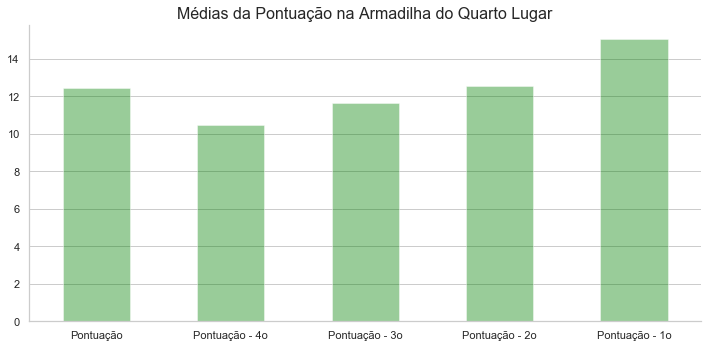

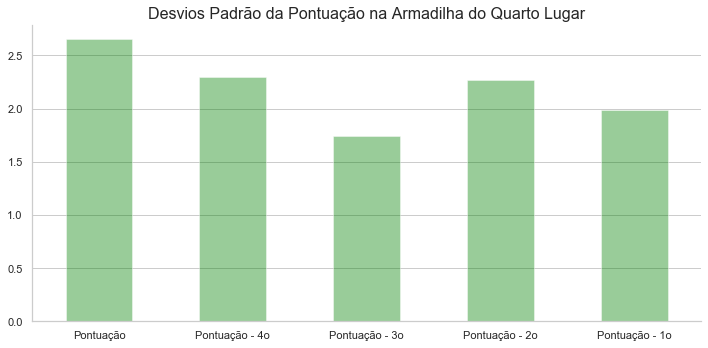

In [178]:
medias1=pd.DataFrame(index=['Pontuação'])
medias1['Pontuação']=vopen1['Pontuação'].mean()
medias1['Pontuação - 4o']=vopen1[vopen1['Ponto1']==1]['Pontuação'].mean()
medias1['Pontuação - 3o']=vopen1[vopen1['Ponto1']==2]['Pontuação'].mean()
medias1['Pontuação - 2o']=vopen1[vopen1['Ponto1']==3]['Pontuação'].mean()
medias1['Pontuação - 1o']=vopen1[vopen1['Ponto1']==4]['Pontuação'].mean()
k=medias1.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='')
k.set_title('Médias da Pontuação na Armadilha do Quarto Lugar',fontsize=16)
k.grid(axis='x',b=False)
k.grid(axis='y',b=True)
sns.despine()
plt.tight_layout()
std1=pd.DataFrame(index=['Pontuação'])
std1['Pontuação']=vopen1['Pontuação'].std()
std1['Pontuação - 4o']=vopen1[vopen1['Ponto1']==1]['Pontuação'].std()
std1['Pontuação - 3o']=vopen1[vopen1['Ponto1']==2]['Pontuação'].std()
std1['Pontuação - 2o']=vopen1[vopen1['Ponto1']==3]['Pontuação'].std()
std1['Pontuação - 1o']=vopen1[vopen1['Ponto1']==4]['Pontuação'].std()
k=std1.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='')
k.set_title('Desvios Padrão da Pontuação na Armadilha do Quarto Lugar',fontsize=16)
k.grid(axis='x',b=False)
k.grid(axis='y',b=True)
sns.despine()
plt.tight_layout()

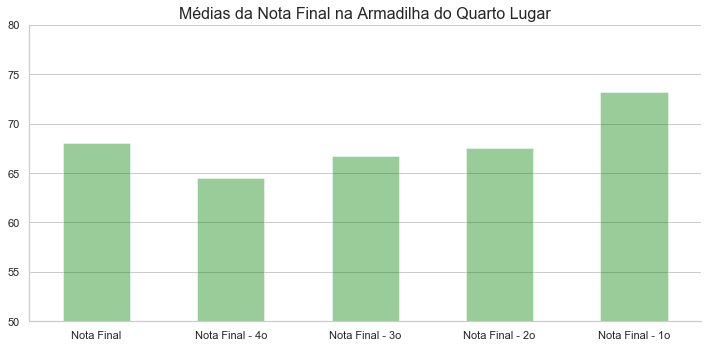

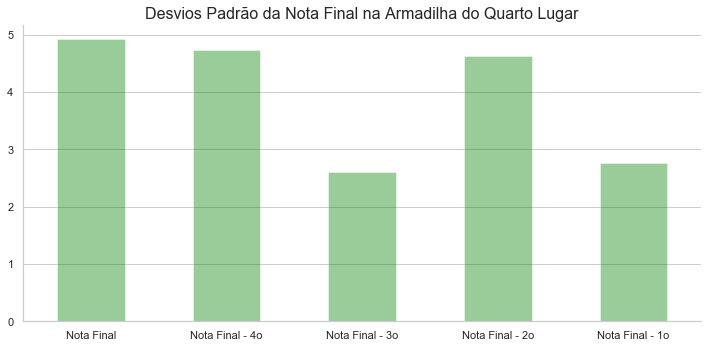

In [179]:
medias2=pd.DataFrame(index=['Nota Final'])
medias2['Nota Final']=vopen1['Nota Final'].mean()
medias2['Nota Final - 4o']=vopen1[vopen1['Ponto1']==1]['Nota Final'].mean()
medias2['Nota Final - 3o']=vopen1[vopen1['Ponto1']==2]['Nota Final'].mean()
medias2['Nota Final - 2o']=vopen1[vopen1['Ponto1']==3]['Nota Final'].mean()
medias2['Nota Final - 1o']=vopen1[vopen1['Ponto1']==4]['Nota Final'].mean()
k=medias2.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='',ylim=(50,80))
k.set_title('Médias da Nota Final na Armadilha do Quarto Lugar',fontsize=16)
k.grid(axis='x',b=False)
k.grid(axis='y',b=True)
sns.despine()
plt.tight_layout()
std2=pd.DataFrame(index=['Nota Final'])
std2['Nota Final']=vopen1['Nota Final'].std()
std2['Nota Final - 4o']=vopen1[vopen1['Ponto1']==1]['Nota Final'].std()
std2['Nota Final - 3o']=vopen1[vopen1['Ponto1']==2]['Nota Final'].std()
std2['Nota Final - 2o']=vopen1[vopen1['Ponto1']==3]['Nota Final'].std()
std2['Nota Final - 1o']=vopen1[vopen1['Ponto1']==4]['Nota Final'].std()
k=std2.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='')
k.set_title('Desvios Padrão da Nota Final na Armadilha do Quarto Lugar',fontsize=16)
k.grid(axis='x',b=False)
k.grid(axis='y',b=True)
sns.despine()
plt.tight_layout()

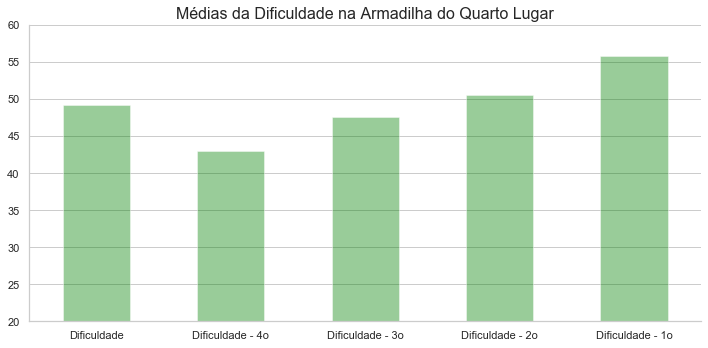

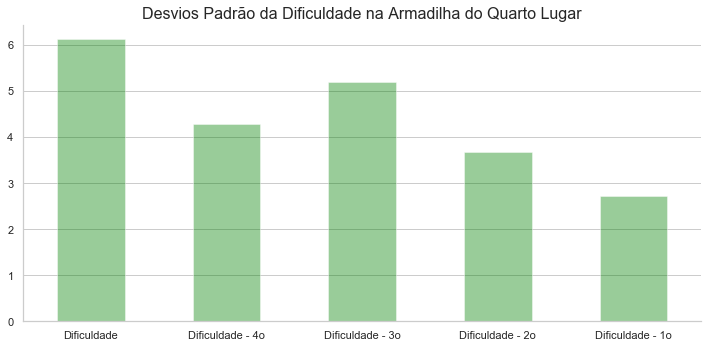

In [180]:
medias3=pd.DataFrame(index=['Dificuldade'])
medias3['Dificuldade']=vopen1['Dificuldade'].mean()
medias3['Dificuldade - 4o']=vopen1[vopen1['Ponto1']==1]['Dificuldade'].mean()
medias3['Dificuldade - 3o']=vopen1[vopen1['Ponto1']==2]['Dificuldade'].mean()
medias3['Dificuldade - 2o']=vopen1[vopen1['Ponto1']==3]['Dificuldade'].mean()
medias3['Dificuldade - 1o']=vopen1[vopen1['Ponto1']==4]['Dificuldade'].mean()
k=medias3.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='',ylim=(20,60))
k.set_title('Médias da Dificuldade na Armadilha do Quarto Lugar',fontsize=16)
k.grid(axis='x',b=False)
k.grid(axis='y',b=True)
sns.despine()
plt.tight_layout()
std3=pd.DataFrame(index=['Dificuldade'])
std3['Dificuldade']=vopen1['Dificuldade'].std()
std3['Dificuldade - 4o']=vopen1[vopen1['Ponto1']==1]['Dificuldade'].std()
std3['Dificuldade - 3o']=vopen1[vopen1['Ponto1']==2]['Dificuldade'].std()
std3['Dificuldade - 2o']=vopen1[vopen1['Ponto1']==3]['Dificuldade'].std()
std3['Dificuldade - 1o']=vopen1[vopen1['Ponto1']==4]['Dificuldade'].std()
k=std3.T.plot(kind='bar',rot=360,color='#008000',alpha=0.4,figsize=(10,5),legend=False)
k.set(xlabel='')
k.set_title('Desvios Padrão da Dificuldade na Armadilha do Quarto Lugar',fontsize=16)
k.grid(axis='x',b=False)
k.grid(axis='y',b=True)
sns.despine()
plt.tight_layout()

## Pontuação da Duplas

Buscaremos analisar a distribuição e a evolução da pontuação das duplas ao longo das rodadas

In [3]:
Pontuação_Agregada_4a_Rodada=[]
Pontuação_Agregada_3a_Rodada=[]
Pontuação_Agregada_2a_Rodada=[]
Pontuação_Agregada_1a_Rodada=[]
vopen_set=vopen.sort_values(by=['ID'])
vopen_set=vopen_set.drop_duplicates(subset='ID',keep='first')
for i in range(1,len(vopen_set)+1):
    Pontuação_da_Rodada=int(vopen_set[vopen_set['ID']==i]['Pontuação'].values)-int(vopen_set[vopen_set['ID']==i]['Ponto5'].values)
    Pontuação_Agregada_4a_Rodada.append(Pontuação_da_Rodada)
vopen_set['Pontuação Agregada da 4a Rodada']=Pontuação_Agregada_4a_Rodada
for i in range(1,len(vopen_set)+1):
    Pontuação_da_Rodada=int(vopen_set[vopen_set['ID']==i]['Pontuação Agregada da 4a Rodada'].values)-int(vopen_set[vopen_set['ID']==i]['Ponto4'].values)
    Pontuação_Agregada_3a_Rodada.append(Pontuação_da_Rodada)
vopen_set['Pontuação Agregada da 3a Rodada']=Pontuação_Agregada_3a_Rodada
for i in range(1,len(vopen_set)+1):
    Pontuação_da_Rodada=int(vopen_set[vopen_set['ID']==i]['Pontuação Agregada da 3a Rodada'].values)-int(vopen_set[vopen_set['ID']==i]['Ponto3'].values)
    Pontuação_Agregada_2a_Rodada.append(Pontuação_da_Rodada)
vopen_set['Pontuação Agregada da 2a Rodada']=Pontuação_Agregada_2a_Rodada
for i in range(1,len(vopen_set)+1):
    Pontuação_da_Rodada=int(vopen_set[vopen_set['ID']==i]['Ponto1'].values)
    Pontuação_Agregada_1a_Rodada.append(Pontuação_da_Rodada)
vopen_set['Pontuação Agregada da 1a Rodada']=Pontuação_Agregada_1a_Rodada
vopen_set.head()

ID                  Nome          SD  Ponto1  Nota1  Sala1  Ponto2  \
84    1        Renato Quintão    Octógono       1     63      1       1   
124   2   Fabiano Mascarenhas  USP Debate       3     67      1       1   
10    3  Pedro Jorge Medeiros      SdDUFC       4     73      1       3   
121   4         Júnior Greski         GDO       2     65      1       2   
0     5         Arthur Gandra     Senatus       4     80      2       4   

     Nota2  Sala2  Ponto3  ...  Nota Final     Rodada  1D  1O  2D  2O  \
84      65     34       1  ...        65.6  1ª Rodada   5   6   7   8   
124     56     27       2  ...        62.4  1ª Rodada  13  14  15  16   
10      70     24       4  ...        74.8  1ª Rodada  17  18  19  20   
121     58     32       1  ...        62.8  1ª Rodada  29  30  31  32   
0       73     24       4  ...        77.2  1ª Rodada  33  34  35  36   

     Pontuação Agregada da 4a Rodada  Pontuação Agregada da 3a Rodada  \
84                                 7                                3   
124                                8                                6   
10                                15                               11   
121                                9                                5   
0                                 13                               12   

     Pontuação Agregada da 2a Rodada  Pontuação Agregada da 1a Rodada  
84                                 2                                1  
124                                4                                3  
10                                 7                                4  
121                                4                                2  
0                                  8                                4  

[5 rows x 30 columns]

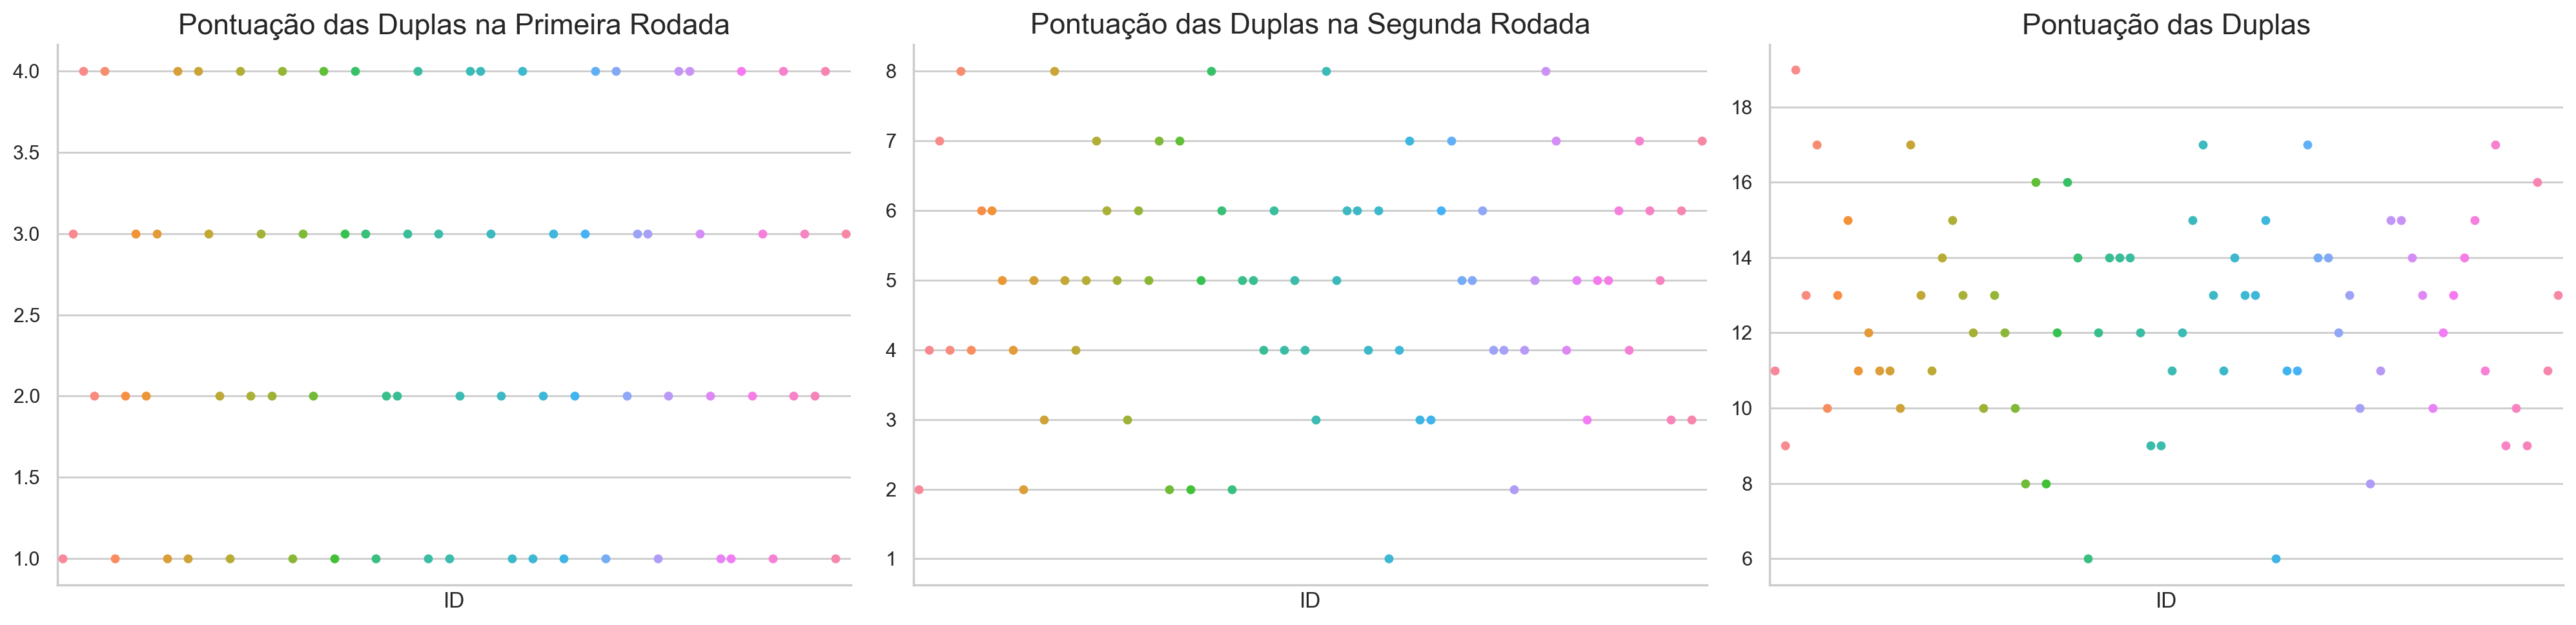

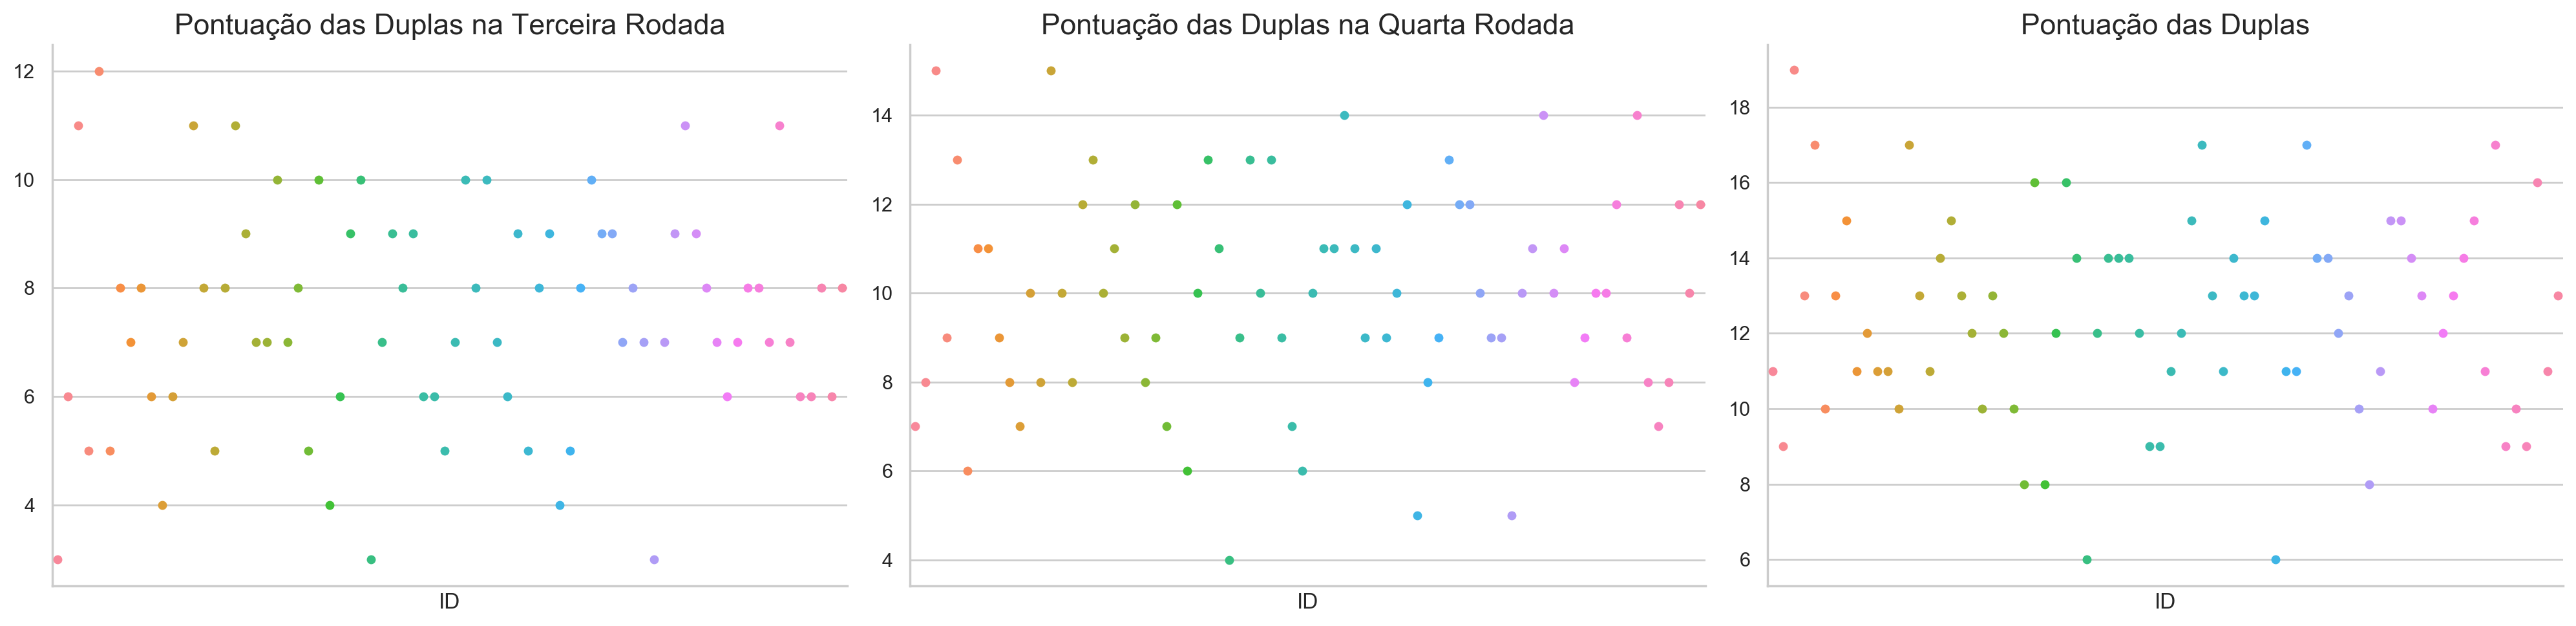

In [10]:
plt.figure(figsize=(40,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="ID",y="Pontuação Agregada da 1a Rodada",data=vopen_set)
a.set_title('Pontuação das Duplas na Primeira Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="ID",y="Pontuação Agregada da 2a Rodada",data=vopen_set)
a.set_title('Pontuação das Duplas na Segunda Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylabel('')
plt.subplot(1,6,3)
a=sns.swarmplot(x="ID",y="Pontuação",data=vopen_set)
a.set_title('Pontuação das Duplas',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylabel('')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(40,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="ID",y="Pontuação Agregada da 3a Rodada",data=vopen_set)
a.set_title('Pontuação das Duplas na Terceira Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="ID",y="Pontuação Agregada da 4a Rodada",data=vopen_set)
a.set_title('Pontuação das Duplas na Quarta Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylabel('')
plt.subplot(1,6,3)
a=sns.swarmplot(x="ID",y="Pontuação",data=vopen_set)
a.set_title('Pontuação das Duplas',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylabel('')
sns.despine()
plt.tight_layout()

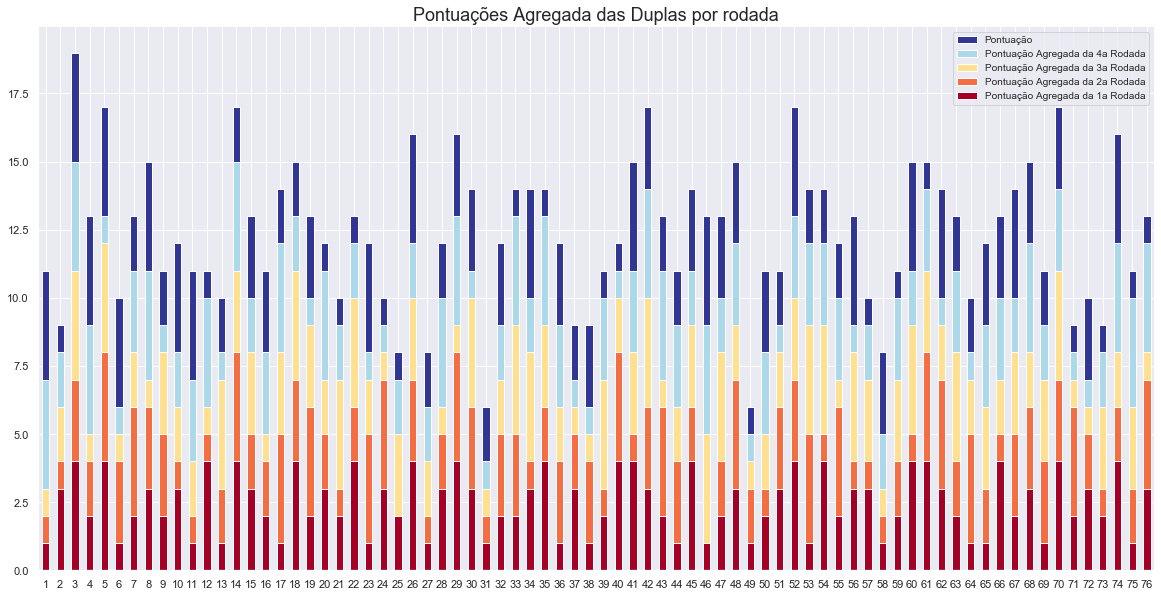

In [80]:
with sns.axes_style("darkgrid"):
    k=vopen_set['Pontuação'].plot(kind='bar',rot=360,figsize=(20,10),stacked=False,color='#313695')
    k=vopen_set['Pontuação Agregada da 4a Rodada'].plot(kind='bar',rot=360,figsize=(20,10),stacked=False,color='#abd9e9')
    k=vopen_set['Pontuação Agregada da 3a Rodada'].plot(kind='bar',rot=360,figsize=(20,10),stacked=False,color='#fee090')
    k=vopen_set['Pontuação Agregada da 2a Rodada'].plot(kind='bar',rot=360,figsize=(20,10),stacked=False,color='#f46d43')
    k=vopen_set['Pontuação Agregada da 1a Rodada'].plot(kind='bar',rot=360,figsize=(20,10),stacked=False,color='#a50026')    
    k.set_title('Pontuações Agregada das Duplas por rodada',fontsize=18)
    k.legend(prop={'size':10})
    lista=[]
    for i in np.arange(1,77):
        lista.append(str(i))
    k.set_xticklabels(labels=lista)    
    sns.despine()
    plt.show()

In [154]:
Evolução_da_Pontuação_na_5a_Rodada=[]
Evolução_da_Pontuação_na_4a_Rodada=[]
Evolução_da_Pontuação_na_3a_Rodada=[]
Evolução_da_Pontuação_na_2a_Rodada=[]
for i in range(1,len(vopen_set)+1):
    Evolução_da_Rodada=int(vopen_set[vopen_set['ID']==i]['Pontuação'].values)-int(vopen_set[vopen_set['ID']==i]['Pontuação Agregada da 4a Rodada'].values)
    Evolução_da_Pontuação_na_5a_Rodada.append(Evolução_da_Rodada**2)
vopen_set['Evolução da Pontuação na 5a Rodada']=Evolução_da_Pontuação_na_5a_Rodada
for i in range(1,len(vopen_set)+1):
    Evolução_da_Rodada=int(vopen_set[vopen_set['ID']==i]['Pontuação Agregada da 4a Rodada'].values)-int(vopen_set[vopen_set['ID']==i]['Pontuação Agregada da 3a Rodada'].values)
    Evolução_da_Pontuação_na_4a_Rodada.append(Evolução_da_Rodada**2)
vopen_set['Evolução da Pontuação na 4a Rodada']=Evolução_da_Pontuação_na_4a_Rodada
for i in range(1,len(vopen_set)+1):
    Evolução_da_Rodada=int(vopen_set[vopen_set['ID']==i]['Pontuação Agregada da 3a Rodada'].values)-int(vopen_set[vopen_set['ID']==i]['Pontuação Agregada da 2a Rodada'].values)
    Evolução_da_Pontuação_na_3a_Rodada.append(Evolução_da_Rodada**2)
vopen_set['Evolução da Pontuação na 3a Rodada']=Evolução_da_Pontuação_na_3a_Rodada
for i in range(1,len(vopen_set)+1):
    Evolução_da_Rodada=int(vopen_set[vopen_set['ID']==i]['Pontuação Agregada da 2a Rodada'].values)-int(vopen_set[vopen_set['ID']==i]['Ponto1'].values)
    Evolução_da_Pontuação_na_2a_Rodada.append(Evolução_da_Rodada**2)
vopen_set['Evolução da Pontuação na 2a Rodada']=Evolução_da_Pontuação_na_2a_Rodada
vopen_set.head()

ID                  Nome          SD  Ponto1  Nota1  Sala1  Ponto2  \
84    1        Renato Quintão    Octógono       1     63      1       1   
124   2   Fabiano Mascarenhas  USP Debate       3     67      1       1   
10    3  Pedro Jorge Medeiros      SdDUFC       4     73      1       3   
121   4         Júnior Greski         GDO       2     65      1       2   
0     5         Arthur Gandra     Senatus       4     80      2       4   

     Nota2  Sala2  Ponto3  ...  2D  2O  Pontuação Agregada da 4a Rodada  \
84      65     34       1  ...   7   8                                7   
124     56     27       2  ...  15  16                                8   
10      70     24       4  ...  19  20                               15   
121     58     32       1  ...  31  32                                9   
0       73     24       4  ...  35  36                               13   

     Pontuação Agregada da 3a Rodada  Pontuação Agregada da 2a Rodada  \
84                                 3                                2   
124                                6                                4   
10                                11                                7   
121                                5                                4   
0                                 12                                8   

     Pontuação Agregada da 1a Rodada  Evolução da Pontuação na 5a Rodada  \
84                                 1                                  16   
124                                3                                   1   
10                                 4                                  16   
121                                2                                  16   
0                                  4                                  16   

     Evolução da Pontuação na 4a Rodada  Evolução da Pontuação na 3a Rodada  \
84                                   16                                   1   
124                                   4                                   4   
10                                   16                                  16   
121                                  16                                   1   
0                                     1                                  16   

     Evolução da Pontuação na 2a Rodada  
84                                    1  
124                                   1  
10                                    9  
121                                   4  
0                                    16  

[5 rows x 34 columns]

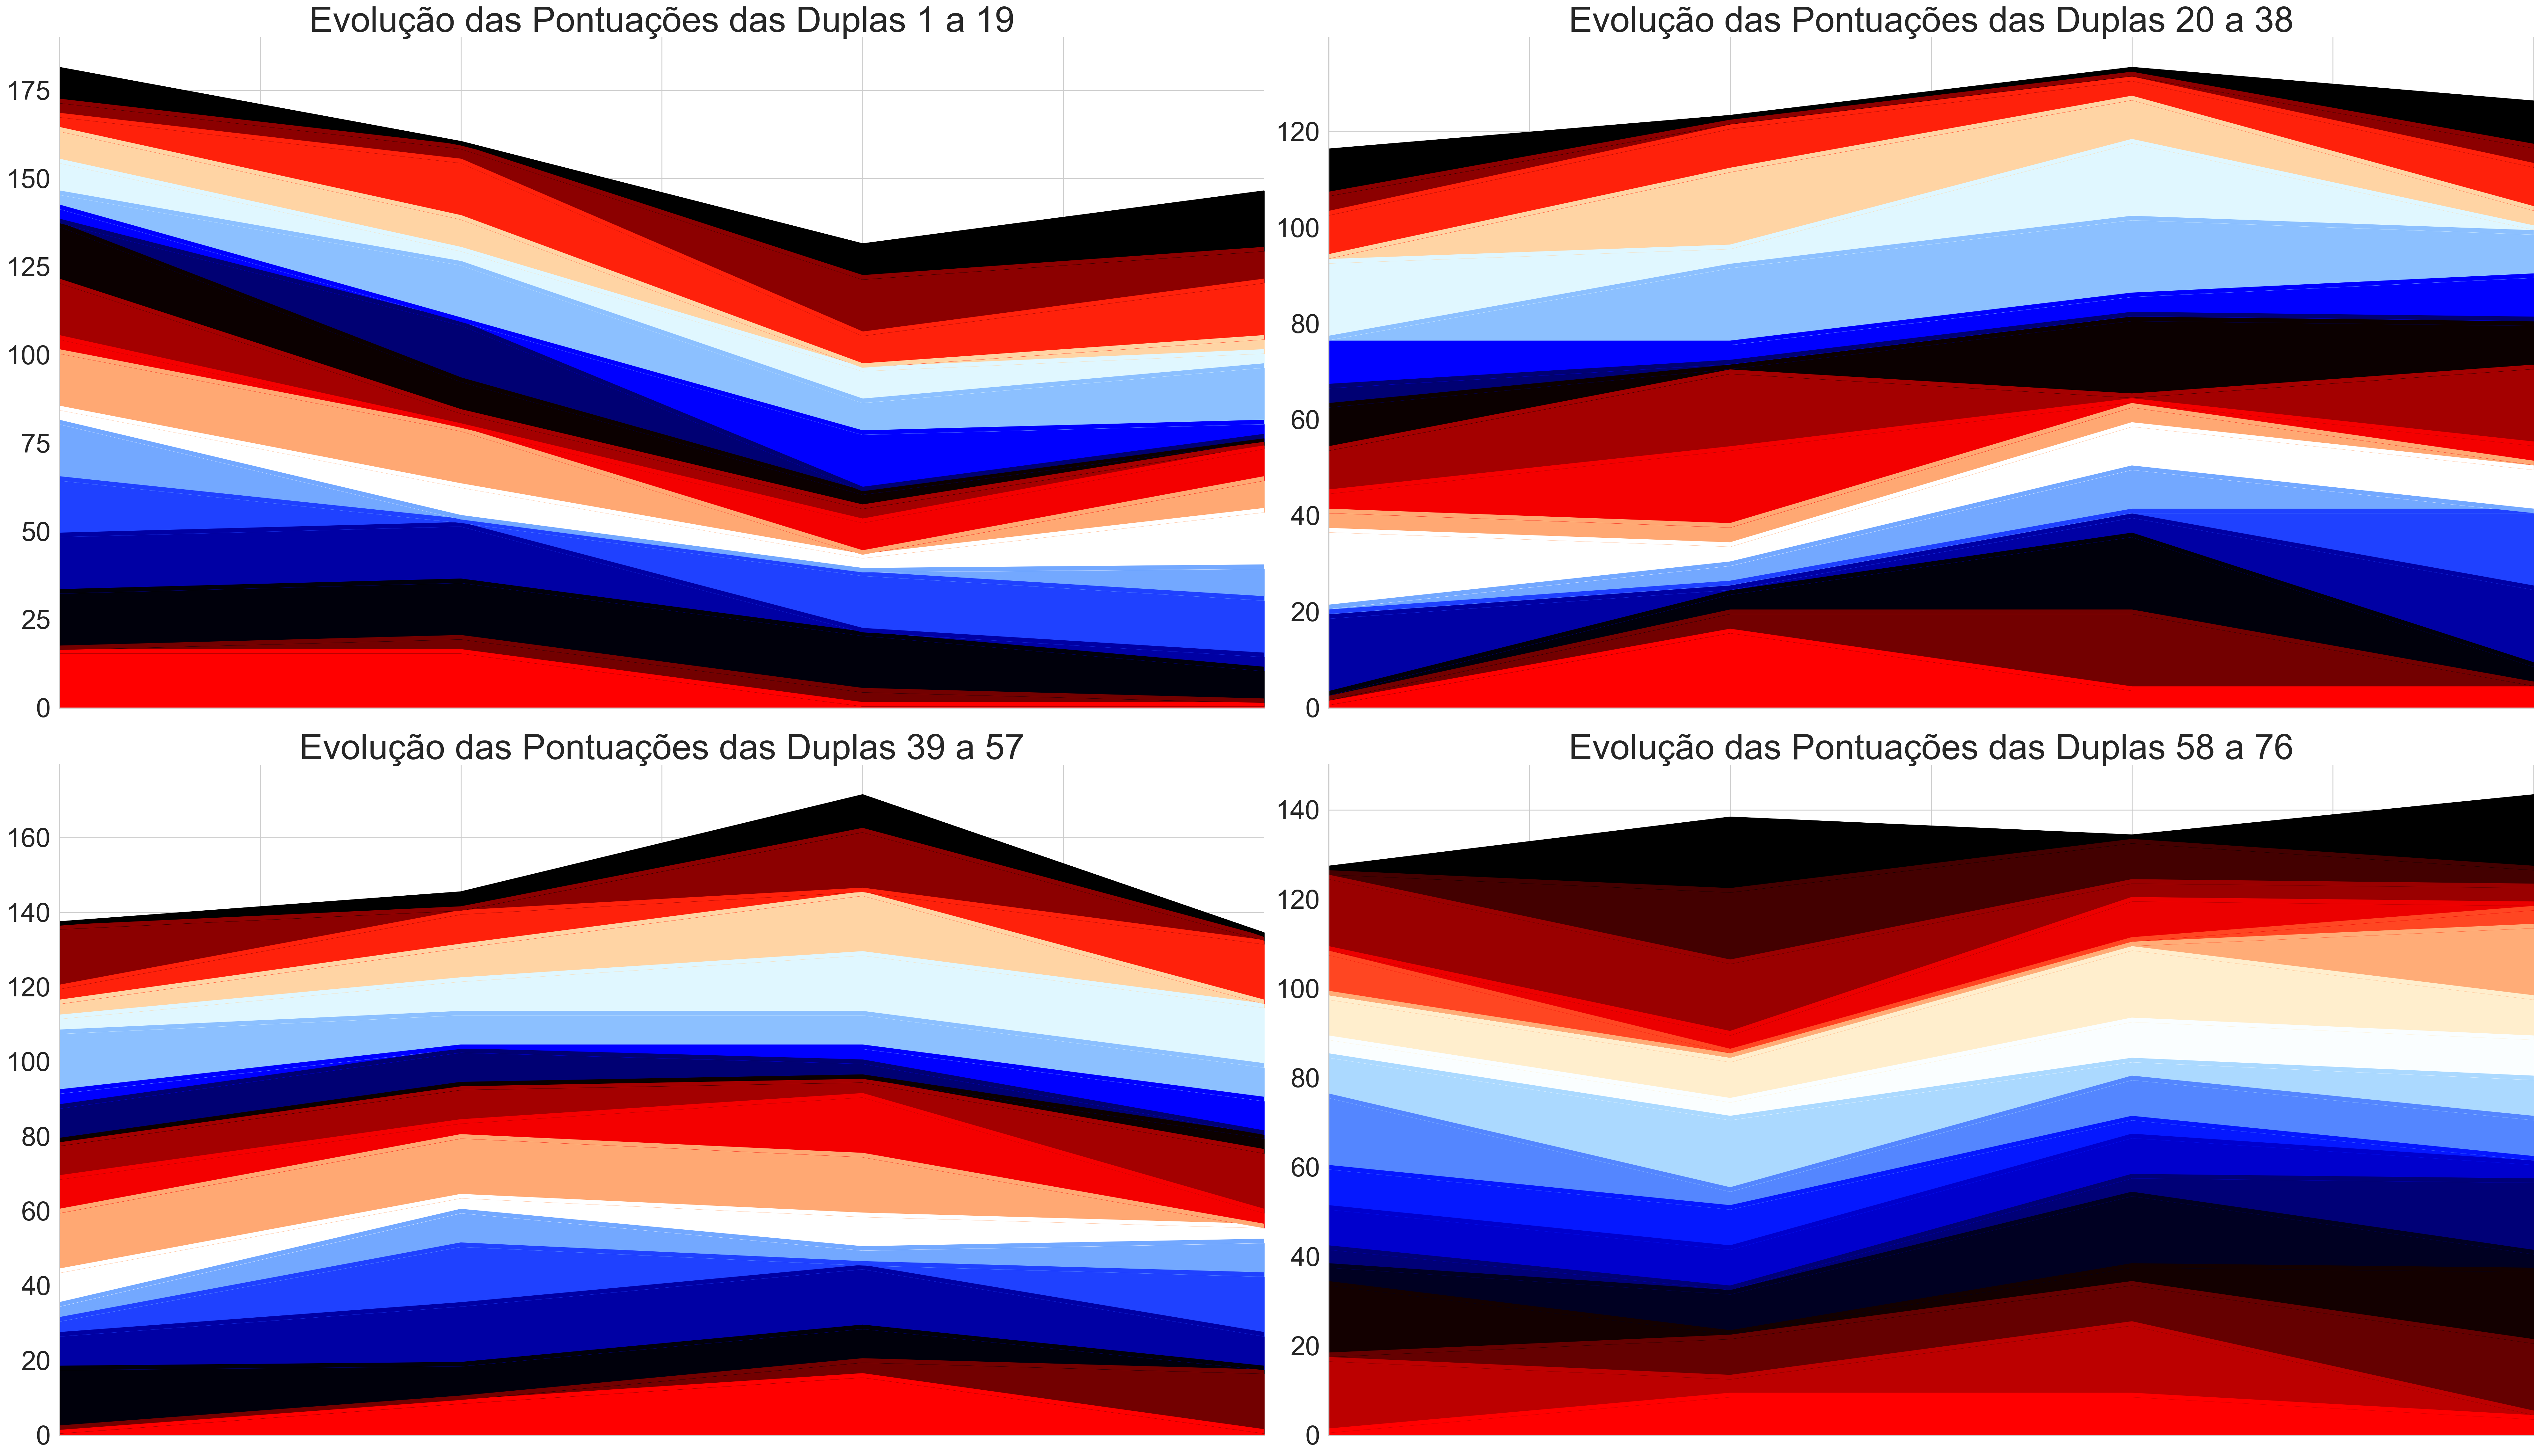

In [109]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(40,23),dpi=200)
df12=vopen_set[vopen_set['ID']<20]
df12=df12[['ID','Evolução da Pontuação na 5a Rodada','Evolução da Pontuação na 4a Rodada',
                'Evolução da Pontuação na 3a Rodada','Evolução da Pontuação na 2a Rodada']]
df12.set_index('ID',inplace=True)
k=df12.T.plot(kind='area',rot=360,stacked=True,legend=False,colormap='flag',linewidth=5,ax=axes[0,0])
k.set_xlabel('')    
k.set_title('Evolução das Pontuações das Duplas 1 a 19',fontsize=40)
k.tick_params(labelsize=30)
k.tick_params(labelbottom=False)    
df12=vopen_set[(vopen_set['ID']>19)&(vopen_set['ID']<39)]
df12=df12[['ID','Evolução da Pontuação na 5a Rodada','Evolução da Pontuação na 4a Rodada',
                'Evolução da Pontuação na 3a Rodada','Evolução da Pontuação na 2a Rodada']]
df12.set_index('ID',inplace=True)
k=df12.T.plot(kind='area',rot=360,stacked=True,legend=False,colormap='flag',linewidth=5,ax=axes[0,1])
k.set_xlabel('')    
k.set_title('Evolução das Pontuações das Duplas 20 a 38',fontsize=40)
k.tick_params(labelsize=30)
k.tick_params(labelbottom=False)    
df12=vopen_set[(vopen_set['ID']>38)&(vopen_set['ID']<58)]
df12=df12[['ID','Evolução da Pontuação na 5a Rodada','Evolução da Pontuação na 4a Rodada',
                'Evolução da Pontuação na 3a Rodada','Evolução da Pontuação na 2a Rodada']]
df12.set_index('ID',inplace=True)
k=df12.T.plot(kind='area',rot=360,stacked=True,legend=False,colormap='flag',linewidth=5,ax=axes[1,0])
k.set_xlabel('')    
k.set_title('Evolução das Pontuações das Duplas 39 a 57',fontsize=40)
k.tick_params(labelsize=30)
k.tick_params(labelbottom=False)    
df12=vopen_set[vopen_set['ID']>58]
df12=df12[['ID','Evolução da Pontuação na 5a Rodada','Evolução da Pontuação na 4a Rodada',
                'Evolução da Pontuação na 3a Rodada','Evolução da Pontuação na 2a Rodada']]
df12.set_index('ID',inplace=True)
k=df12.T.plot(kind='area',rot=360,stacked=True,legend=False,colormap='flag',linewidth=5,ax=axes[1,1])
k.set_xlabel('')    
k.set_title('Evolução das Pontuações das Duplas 58 a 76',fontsize=40)
k.tick_params(labelsize=30)
k.tick_params(labelbottom=False)    
sns.despine()
plt.tight_layout()